# Analysis of Hospital Inpatient Discharges (SPARCS De-Identified): 2015

**Dataset Information**

The Statewide Planning and Research Cooperative System (SPARCS) Inpatient De-identified File contains discharge level detail on patient characteristics, diagnoses, treatments, services, and charges. This data file contains basic record level detail for the discharge. The de-identified data file does not contain data that is protected health information (PHI) under HIPAA. The health information is not individually identifiable; all data elements considered identifiable have been redacted. For example, the direct identifiers regarding a date have the day and month portion of the date removed.

https://www.kaggle.com/jonasalmeida/2015-deidentified-ny-inpatient-discharge-sparcs

Discharges that are identified as abortion will have some information redacted; PFI, Facility Name, Health Service Area, Hospital County, Operating Certificate, and all provider license numbers. Patient zip code is limited to the first three digits. However, in cases where the population size for the zip code is less than 20,000, if the cell size on patient classification strata are less than 10, or if the record is an abortion then the zip code is blank. The code “OOS” indicates Out of State zip codes. Patient age is presented in age groups: 0 to 17, 18 to 29, 30 to 49, 50 to 69, and 70 or Older. For years beginning with 2011, the variable indicating the type of insurance expected to pay the discharge has changed. Originally it was the Source of Payment. Effective December 2015, it is now the Payment Typology.

There are **2346760 rows** and **37 columns** in the dataset.

The **columns** in the dataset are:
'Health Service Area', 'Hospital County', 'Operating Certificate Number', 'Facility Id', 'Facility Name',
'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
'Length of Stay', 'Type of Admission', 'Patient Disposition',
'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
'APR Severity of Illness Code', 'APR Severity of Illness Description',
'APR Risk of Mortality', 'APR Medical Surgical Description',
'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
'Attending Provider License Number',
'Operating Provider License Number', 'Other Provider License Number',
'Birth Weight', 'Abortion Edit Indicator',
'Emergency Department Indicator', 'Total Charges', 'Total Costs'

The target is to **predict the length of stay** in the hospital.

**Importing the Libraries and the Dataset**

First step is to import all the libraries that will be necessary (and some more) for the analysis; plus the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import sweetviz as sw
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('Hospital_Inpatient_Discharges__SPARCS_De-Identified___2015.csv')

In [3]:
df.head()

Health Service Area Hospital County  Operating Certificate Number  \
0          Western NY     Cattaraugus                      401001.0   
1          Western NY     Cattaraugus                      401001.0   
2          Western NY     Cattaraugus                      401001.0   
3          Western NY     Cattaraugus                      401001.0   
4          Western NY      Chautauqua                      602001.0   

   Facility Id                  Facility Name Age Group Zip Code - 3 digits  \
0         66.0         Olean General Hospital  50 to 69                 147   
1         66.0         Olean General Hospital  18 to 29                 147   
2         66.0         Olean General Hospital  30 to 49                 147   
3         66.0         Olean General Hospital  50 to 69                 147   
4        103.0  Woman's Christian Association  50 to 69                 147   

  Gender   Race          Ethnicity Length of Stay Type of Admission  \
0      F  White  Not Span/Hispanic              5         Emergency   
1      F  White  Not Span/Hispanic              8         Emergency   
2      M  White  Not Span/Hispanic              8         Emergency   
3      F  White  Not Span/Hispanic              4         Emergency   
4      M  White  Not Span/Hispanic              3         Emergency   

  Patient Disposition  Discharge Year  CCS Diagnosis Code  \
0   Home or Self Care            2015                 657   
1   Home or Self Care            2015                 657   
2   Home or Self Care            2015                 657   
3   Home or Self Care            2015                 128   
4   Home or Self Care            2015                  83   

  CCS Diagnosis Description  CCS Procedure Code CCS Procedure Description  \
0            Mood disorders                   0                   NO PROC   
1            Mood disorders                   0                   NO PROC   
2            Mood disorders                   0                   NO PROC   
3                    Asthma                   0                   NO PROC   
4     Epilepsy; convulsions                   0                   NO PROC   

   APR DRG Code APR DRG Description  APR MDC Code  \
0           753   Bipolar disorders            19   
1           753   Bipolar disorders            19   
2           753   Bipolar disorders            19   
3           141              Asthma             4   
4            53             Seizure             1   

                                APR MDC Description  \
0                     Mental Diseases and Disorders   
1                     Mental Diseases and Disorders   
2                     Mental Diseases and Disorders   
3  Diseases and Disorders of the Respiratory System   
4      Diseases and Disorders of the Nervous System   

   APR Severity of Illness Code APR Severity of Illness Description  \
0                             1                               Minor   
1                             2                            Moderate   
2                             1                               Minor   
3                             1                               Minor   
4                             2                            Moderate   

  APR Risk of Mortality APR Medical Surgical Description Payment Typology 1  \
0                 Minor                          Medical           Medicaid   
1                 Minor                          Medical           Medicaid   
2                 Minor                          Medical           Medicaid   
3                 Minor                          Medical           Medicare   
4              Moderate                          Medical           Medicaid   

  Payment Typology 2 Payment Typology 3  Attending Provider License Number  \
0                NaN                NaN                           267162.0   
1                NaN                NaN                           275408.0   
2                NaN                NaN                  

**Data Preprocessing**

In [4]:
df.shape

(2346760, 37)

The dataset has **37 columns** and **2346760 rows**, and the rows represent different cases in the NY state hospitals.

In [5]:
df.columns

Index(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility Id', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

Some of the columns' **datatypes** are mistaken here, e.g., costs, length of stay, zip codes etc. were supposed to  be float or integer, but they are objetcs; they should be corrected.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346760 entries, 0 to 2346759
Data columns (total 37 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

Technically, no dataset is perfect. Next step will be to find the null values in the columns.

In [4]:
df.isnull().sum()

Health Service Area                       2911
Hospital County                           2911
Operating Certificate Number              2911
Facility Id                               2911
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       4427
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

There are some/many null values in some columns. My decision is:

"Other Provider License Number", "Operating Provider License Number", "Payment Typology 3" and "Payment Typology 2" **columns** should be **dropped** due to the huge percentage of NaNs.

NaN values in the columns of "Health Service Area", "Hospital County", "Operating Certificate Number", "Facility Id", "Zip Code - 3 digits", "APR Severity of Illness Description", "APR Risk of Mortality" and "Attending Provider License Number" have an insignificant percentage in total, so the **rows** with null values will be **dropped**.

In [5]:
df = df.drop(['Other Provider License Number','Payment Typology 2','Payment Typology 3','Operating Provider License Number'], axis=1)

In [6]:
df = df.dropna(subset=["APR Severity of Illness Description", "APR Risk of Mortality", "Attending Provider License Number"])

In [7]:
df = df.dropna(subset=['APR Severity of Illness Description', 'APR Risk of Mortality','Zip Code - 3 digits','Facility Id','Attending Provider License Number'])

Double chechk to confirm that the dataset has no null values.

In [8]:
df.isnull().sum()

Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility Id                            0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mort

In [9]:
df.shape

(2342221, 33)


We just made sure that there are no more **NaN**s in the dataset.


Before going further, dtypes of the columns should be checked. Some of the columns have an **object** type although they represent numeric values. For "**Total Charges**" and "**Total Costs**" columns, there are **$** signs and those signs should be dealt with first.

Also, "**Length of Stay**", the target column should be converted to integer dtype.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342221 entries, 0 to 2346759
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Health Service Area                  object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Facility Id                          float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

In [10]:
df['Total Costs'] = df['Total Costs'].apply(lambda x: str(x).replace('$',''))
df['Total Costs'] = pd.to_numeric(df['Total Costs'])
df['Total Charges'] = df['Total Charges'].apply(lambda x: str(x).replace('$',''))
df['Total Charges'] = pd.to_numeric(df['Total Charges'])

In [11]:
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

"**Length of Stay**" is supposed to have a numerical data type, but some rows are marked as '120 +'. I dropped all the '+' signs. So, any patient staying more than 120 days will be considered as having a Lenght of Stay of 120 days.

In [12]:
df['Length of Stay']=[each.replace("+","") if(each=="120 +") else each for each in df['Length of Stay']]

In [13]:
df["Length of Stay"]=df["Length of Stay"].astype('int')

In [18]:
df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int32
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

# Exploratory Data Analysis (EDA)

Next step will be EDA, and the target is to analyze the dataset to **summarize the dataset's main characteristics**, often using statistical graphics and other data visualization methods.

In [14]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(dropna=False))
    print('*'*33)

Health Service Area
New York City     1090826
Long Island        339240
Hudson Valley      245917
Capital/Adiron     167322
Western NY         163893
Central NY         158296
Finger Lakes       146558
Southern Tier       30169
Name: Health Service Area, dtype: int64
*********************************
Hospital County
Manhattan      399693
Kings          248927
Queens         197173
Bronx          188124
Nassau         181142
Suffolk        158098
Erie           120556
Westchester    119375
Monroe         105154
Onondaga        78374
Albany          65717
Richmond        56909
Orange          39500
Dutchess        32594
Rockland        31940
Oneida          29902
Broome          28525
Schenectady     22325
Niagara         17152
Warren          14090
Chemung         13845
Otsego          12265
Rensselaer      11957
Ontario         11950
Ulster          11359
St Lawrence     11106
Jefferson       10823
Chautauqua      10489
Clinton          9816
Saratoga         9237
Tompkins         7246


Neonate birthwt >2499g, normal newborn or neonate w other problem    197816
Vaginal delivery                                                     146636
Septicemia & disseminated infections                                  94929
Cesarean delivery                                                     75940
Heart failure                                                         56350
                                                                      ...  
Abortion w/o D&C, aspiration curettage or hysterotomy                    91
Neonate w ECMO                                                           53
Extensive 3rd degree burns w skin graft                                  43
Neonate, transferred <5 days old, not born here                          35
Pancreas transplant                                                      34
Name: APR DRG Description, Length: 314, dtype: int64
*********************************
APR MDC Code
5     289419
14    250907
15    231451
8     204551
6     197548

Considering the target column, "Length of Stay", the plot shows thatit is **highly skewed** and most of the patients (around **1,700,000** out of 2346760) stayed at the hospitals for **5 days and less**. By the way, **5.48 days** is the mean value.

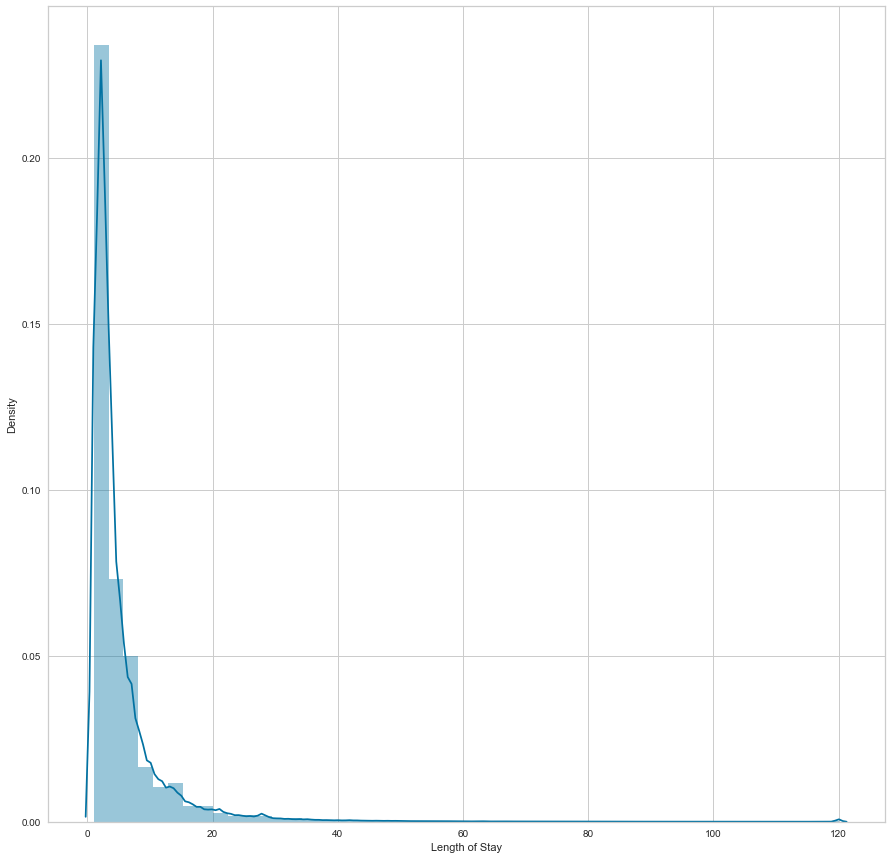

In [15]:
fig = plt.figure(figsize=(15,15))
sns.distplot(df['Length of Stay'])
plt.show();

In [16]:
df['Length of Stay'].value_counts()

2      542347
3      424065
1      337195
4      247358
5      160530
        ...  
119        41
111        41
115        37
116        31
108        26
Name: Length of Stay, Length: 120, dtype: int64

Boxplot shows the **shape of distribution** quite well. As can be seen from the plot, 75 % of all the values for '**Length of Stay**' is below 6 days. The rest (25%) is distributed as outliers.

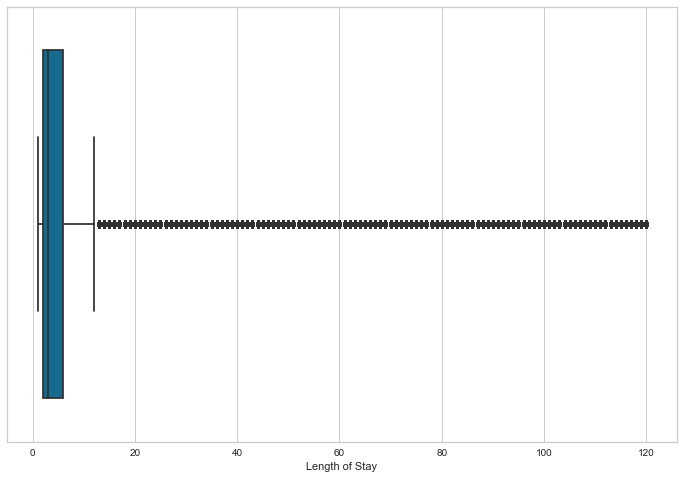

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Length of Stay']);

In the boxplot below, "**Total Charges**", the mean and 75% values are around $ 40+. There are also very high values - outliers- millions of dollars.   

P.S.: I limited the x axis (Total Charges) in order to be able to get a good view of the distribution. 

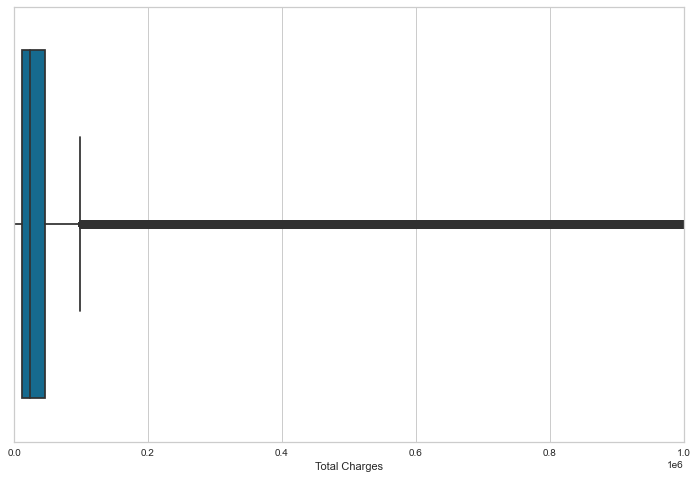

In [18]:
plt.figure(figsize=(12,8))
a = sns.boxplot(x=df['Total Charges'])
a.set(xlim=(0,1000000));

In the boxplot below, "**Total Costs**", the mean and 75% values are around $ 16,000. There are also very high values - outliers- millions of dollars.

P.S.: I limited the x axis (Total Costs) in order to be able to get a good view of the distribution.


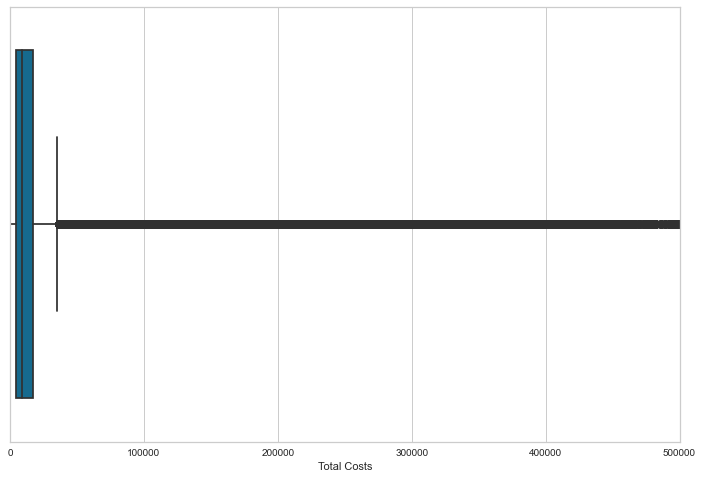

In [19]:
plt.figure(figsize=(12,8))
a=sns.boxplot(x=df['Total Costs'])
a.set(xlim=(0,500000));

Pandas **describe()** function is used to generate descriptive statistics, which include values that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [20]:
df.describe().T

count          mean           std  \
Operating Certificate Number       2342221.0  5.006227e+06  2.259531e+06   
Facility Id                        2342221.0  1.043141e+03  7.135456e+02   
Length of Stay                     2342221.0  5.480060e+00  8.035354e+00   
Discharge Year                     2342221.0  2.015000e+03  0.000000e+00   
CCS Diagnosis Code                 2342221.0  1.905596e+02  1.597189e+02   
CCS Procedure Code                 2342221.0  1.127538e+02  8.897563e+01   
APR DRG Code                       2342221.0  4.178865e+02  2.414170e+02   
APR MDC Code                       2342221.0  1.042384e+01  5.926276e+00   
APR Severity of Illness Code       2342221.0  2.011237e+00  8.974071e-01   
Attending Provider License Number  2342221.0  2.176400e+06  1.201709e+07   
Birth Weight                       2342221.0  3.264818e+02  1.000243e+03   
Total Charges                      2342221.0  4.323095e+04  8.046165e+04   
Total Costs                        2342221.0  1.599223e+04  3.239425e+04   

                                         min         25%         50%  \
Operating Certificate Number       101000.00  2951001.00  5907001.00   
Facility Id                             1.00      541.00     1099.00   
Length of Stay                          1.00        2.00        3.00   
Discharge Year                       2015.00     2015.00     2015.00   
CCS Diagnosis Code                      1.00      106.00      158.00   
CCS Procedure Code                      0.00        0.00      132.00   
APR DRG Code                            1.00      200.00      383.00   
APR MDC Code                            1.00        5.00        9.00   
APR Severity of Illness Code            1.00        1.00        2.00   
Attending Provider License Number     615.00   192317.00   229495.00   
Birth Weight                            0.00        0.00        0.00   
Total Charges                           0.01    12033.86    23501.05   
Total Costs                             0.00     4725.78     8797.00   

                                          75%          max  
Operating Certificate Number       7002009.00   7004010.00  
Facility Id                           1450.00      9431.00  
Length of Stay                           6.00       120.00  
Discharge Year                        2015.00      2015.00  
CCS Diagnosis Code                     218.00       917.00  
CCS Procedure Code                     216.00       999.00  
APR DRG Code                           640.00       952.00  
APR MDC Code                            15.00        25.00  
APR Severity of Illness Code             3.00         4.00  
Attending Provider License Number   257910.00  90999999.00  
Birth Weight                             0.00      9900.00  
Total Charges                        46645.00   7248390.82  
Total Costs                          16844.66   5236614.76

Correlation values of the numeric columns with the 'Length of Stay' is shown below. 

After get_dummies is applied, the number of numeric columns will increase and there will be a better picture. 

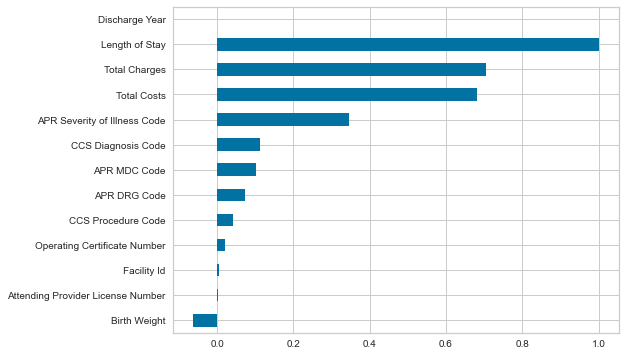

In [21]:
df.corr()['Length of Stay'].sort_values().plot.barh(figsize=(8,6));

Heatmap, which is defined as a graphical representation of data using colors to visualize the value of the matrix, is used to correlation values of the numeric columns. **Total Charges and Costs** have the highest correlation with the **Length of Stay**.

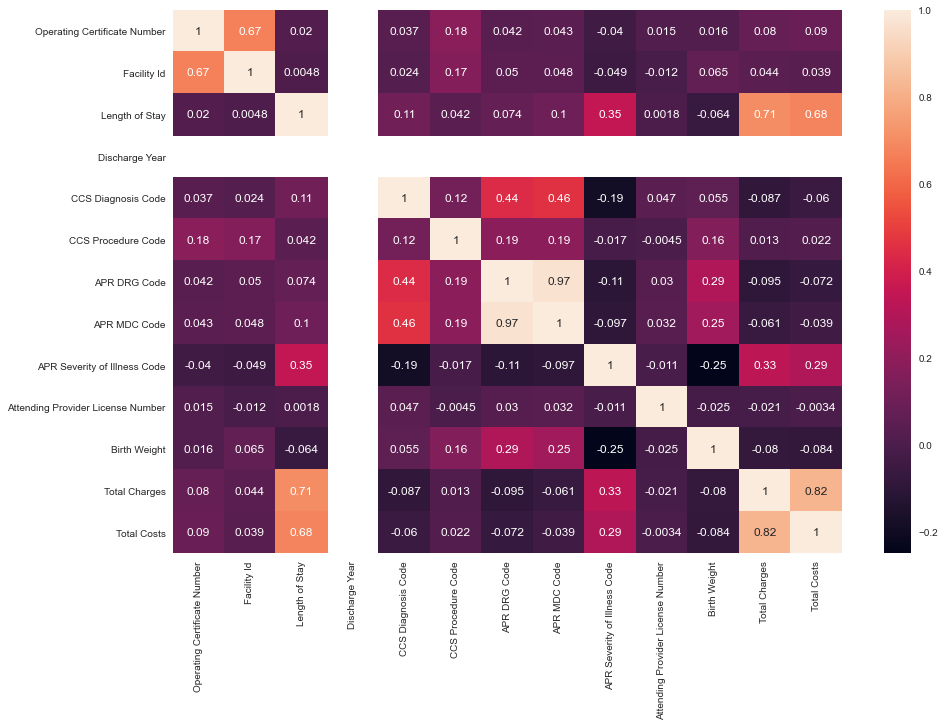

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True);

The plot below shows the counts of observations in each **Age Group**. As expected, number of older patients is higher. 

50 to 69       644774
70 or Older    643124
30 to 49       456448
0 to 17        352050
18 to 29       245825
Name: Age Group, dtype: int64

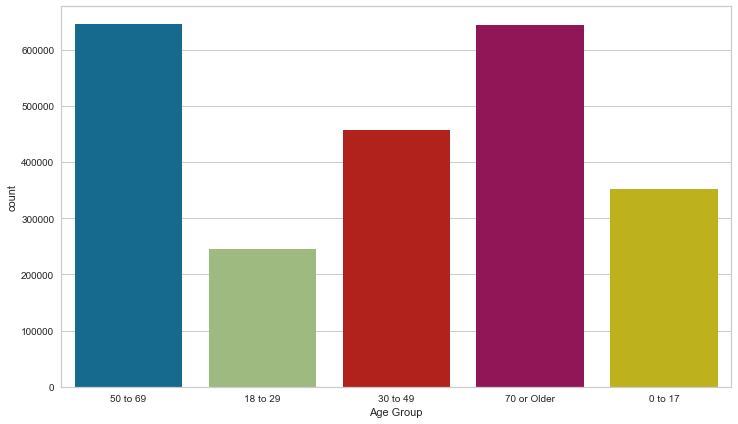

In [99]:
plt.figure(figsize=(12,7))
sns.countplot(x='Age Group', data = df);
df['Age Group'].value_counts()

The plot below shows the counts of observations in each **Gender**. Number of **female** patients is considerably higher.

F    1303589
M    1038593
U         39
Name: Gender, dtype: int64

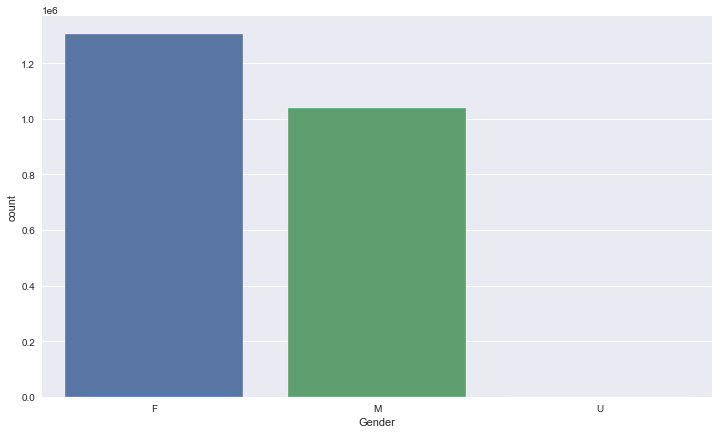

In [216]:
plt.figure(figsize=(12,7))
sns.countplot(x='Gender', data = df);
df.Gender.value_counts()

The plot below shows the counts of observations for each **Race**. Number of white patients is higher, but it is coherent with the demograohics data of NY state (link below).

https://en.wikipedia.org/wiki/Demographics_of_New_York_(state)

White                     1333050
Other Race                 543104
Black/African American     443817
Multi-racial                22250
Name: Race, dtype: int64

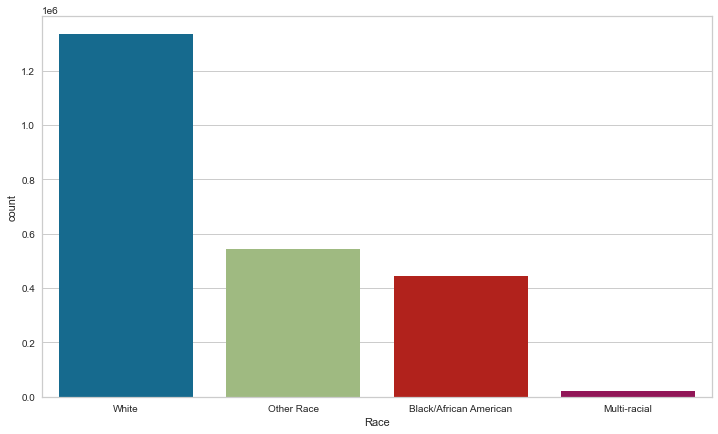

In [101]:
plt.figure(figsize=(12,7))
sns.countplot(x='Race', data = df);
df.Race.value_counts()

The plot below shows the counts of observations for each **Ethnicity**. This column may need further investigation.

Not Span/Hispanic    1950947
Spanish/Hispanic      277819
Unknown               104801
Multi-ethnic            8654
Name: Ethnicity, dtype: int64

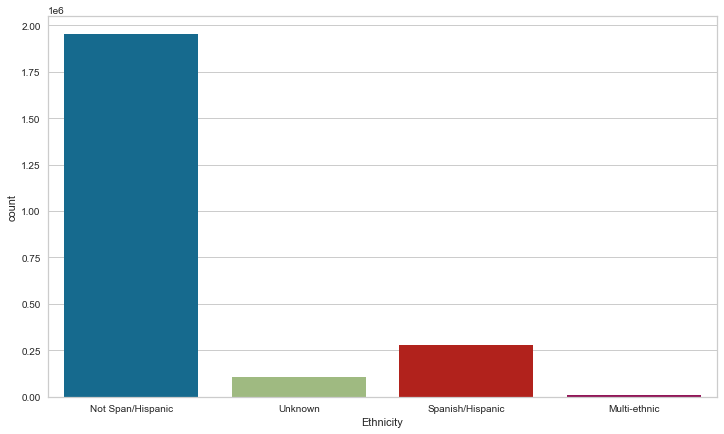

In [102]:
plt.figure(figsize=(12,7))
sns.countplot(x='Ethnicity', data = df);
df.Ethnicity.value_counts()

Parallel to the above results, **Length of Stay** values are similar. 

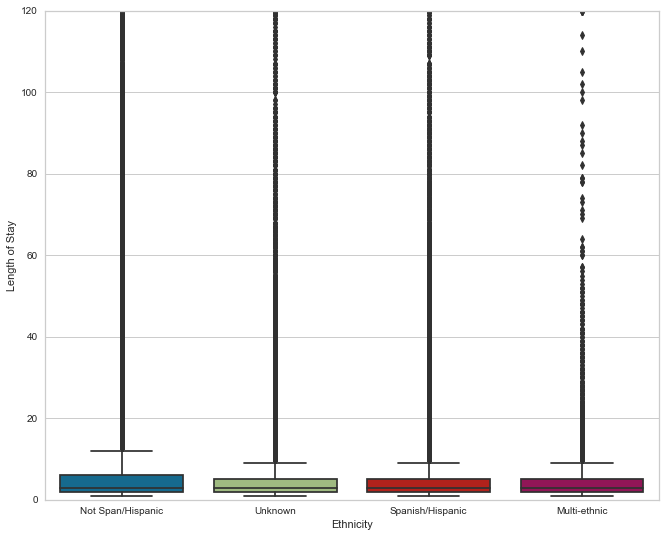

In [103]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Ethnicity", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 120));

The plot below shows the counts of observations for each **Type of Admission**. This column may have an effect on the Length of Stay.

Emergency        1485353
Elective          446428
Newborn           226682
Urgent            176196
Trauma              6392
Not Available       1170
Name: Type of Admission, dtype: int64

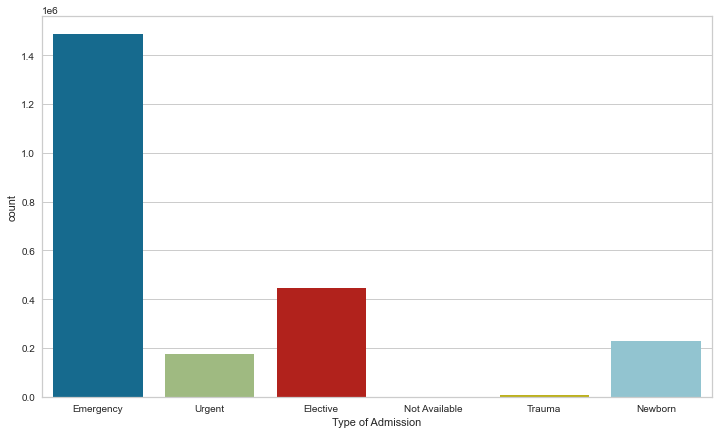

In [104]:
plt.figure(figsize=(12,7))
sns.countplot(x='Type of Admission', data = df);
df['Type of Admission'].value_counts()

Boxplots below show that, other than **Emergency** as the Type of Admission, Length of Stay values are similar.

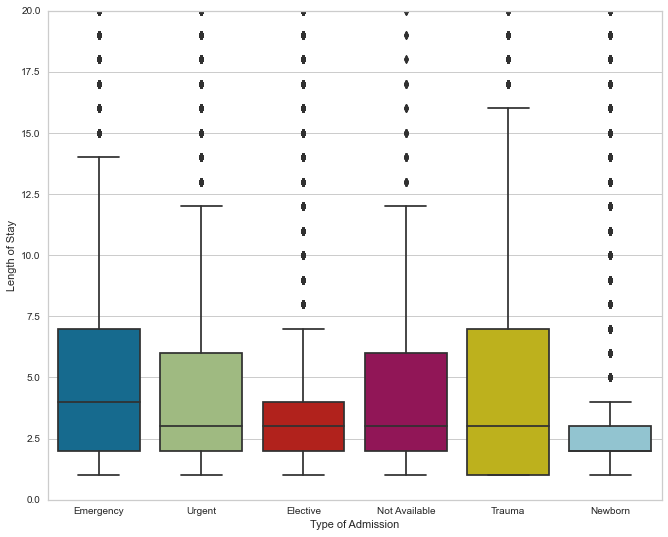

In [105]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="Type of Admission", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20));

Distribution and counts of **Patient Disposition** are shown below. 

Home or Self Care                        1568050
Home w/ Home Health Services              304155
Skilled Nursing Home                      223941
Expired                                    50958
Left Against Medical Advice                46998
Inpatient Rehabilitation Facility          44504
Short-term Hospital                        40468
Hospice - Medical Facility                 12656
Psychiatric Hospital or Unit of Hosp       12072
Hospice - Home                             10724
Another Type Not Listed                     8351
Facility w/ Custodial/Supportive Care       6678
Court/Law Enforcement                       3882
Medicare Cert Long Term Care Hospital       3445
Cancer Center or Children's Hospital        2906
Hosp Basd Medicare Approved Swing Bed       1547
Federal Health Care Facility                 621
Critical Access Hospital                     153
Medicaid Cert Nursing Facility               112
Name: Patient Disposition, dtype: int64

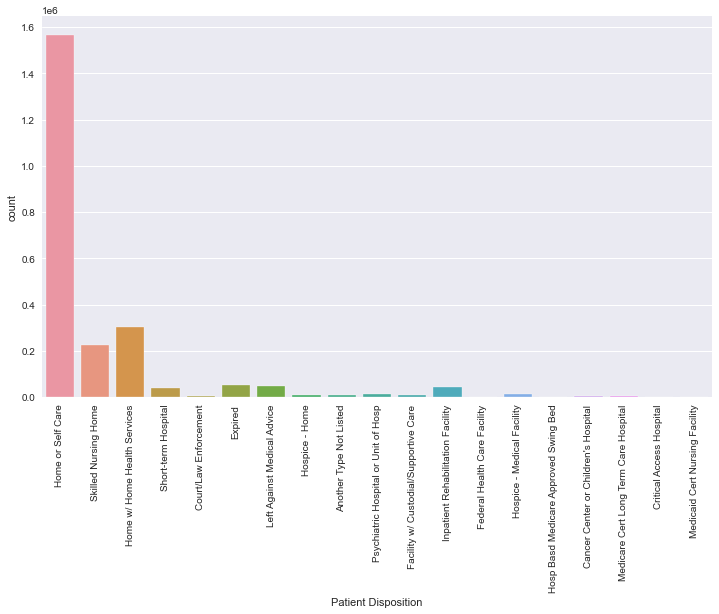

In [217]:
plt.figure(figsize=(12,7))
sns.countplot(x='Patient Disposition', data = df)
plt.xticks(rotation=90);
df['Patient Disposition'].value_counts()

The plot below shows the counts of observations for each **APR Severity of Illness Code**. This column may have an effect on the Length of Stay.

2    895521
1    783503
3    516571
4    146626
Name: APR Severity of Illness Code, dtype: int64

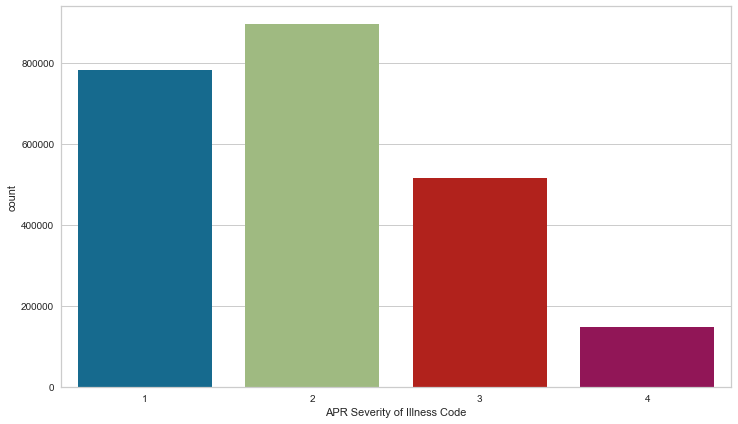

In [107]:
plt.figure(figsize=(12,7))
sns.countplot(x='APR Severity of Illness Code', data = df);
df['APR Severity of Illness Code'].value_counts()

Boxplots below definitely show that, **APR Severity of Illness Code** has a huge influence on the Length of Stay.

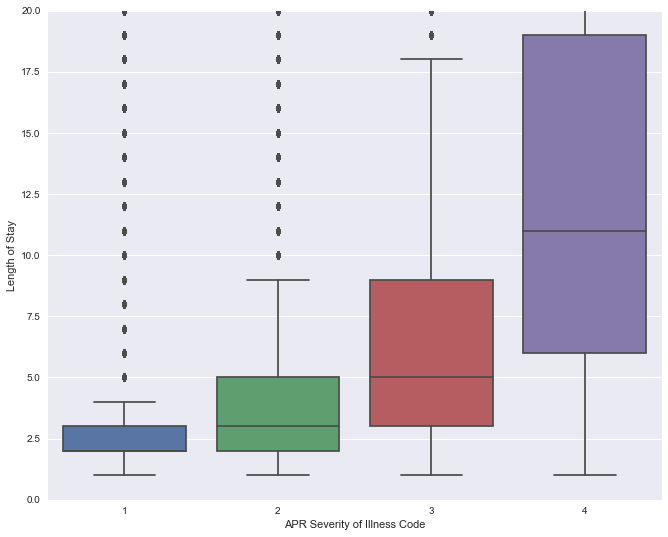

In [218]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Code", y="Length of Stay",
            data=df)
ax.set(ylim=(0, 20));

The boxplot below (**APR Severity of Illness Description**) is parallel to the one above.

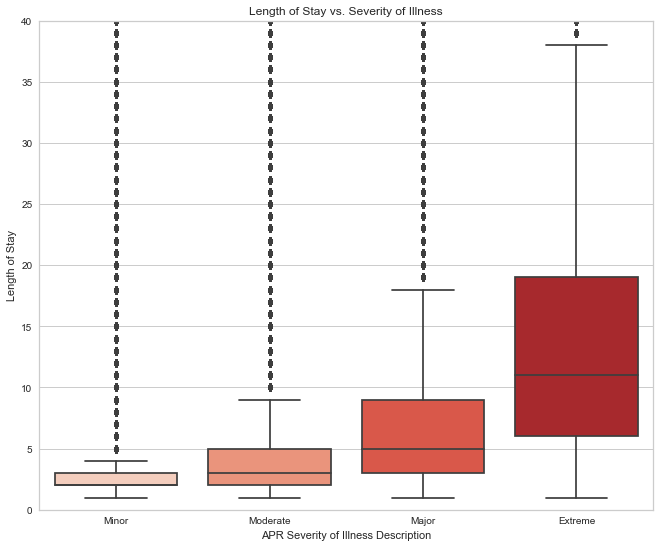

In [108]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Severity of Illness Description", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.title('Length of Stay vs. Severity of Illness')
plt.show()

The countplot below shows that almost 80% of **APR Risk of Mortality** assessment is minor and moderate. For further assessment, I will make a boxplot.

Minor       1385860
Moderate     499685
Major        335013
Extreme      121663
Name: APR Risk of Mortality, dtype: int64

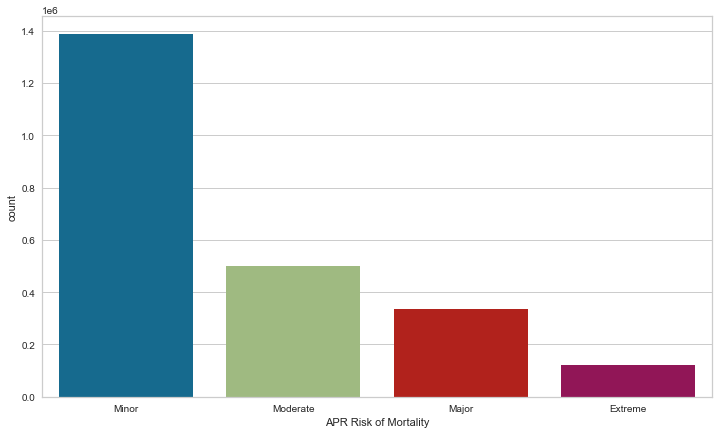

In [109]:
plt.figure(figsize=(12,7))
sns.countplot(x='APR Risk of Mortality', data = df);
df['APR Risk of Mortality'].value_counts()

The boxplot below proves the influence of **APR Risk of Mortality** on the Length of Stay.

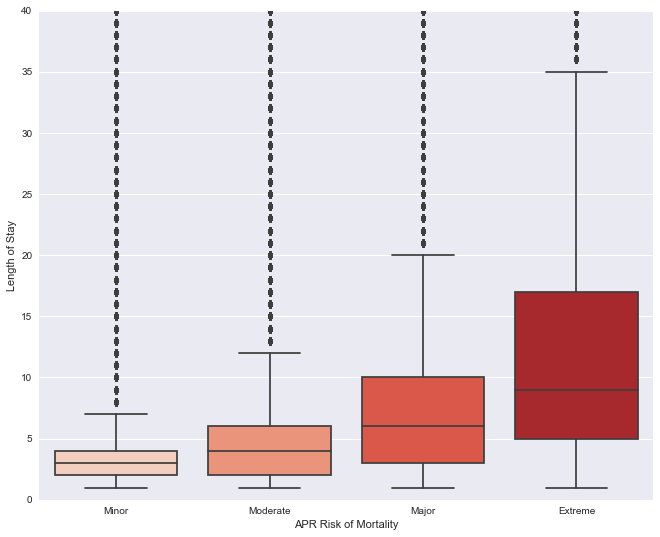

In [219]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="APR Risk of Mortality", y="Length of Stay",
            data=df, palette='Reds')
ax.set(ylim=(0, 40))
plt.show()

Distribution of **Payment Typology**> Needs further study.

Medicare                     875810
Medicaid                     715311
Private Health Insurance     333320
Blue Cross/Blue Shield       274930
Self-Pay                      67698
Miscellaneous/Other           28965
Managed Care, Unspecified     22969
Federal/State/Local/VA        12419
Unknown                        6270
Department of Corrections      4529
Name: Payment Typology 1, dtype: int64

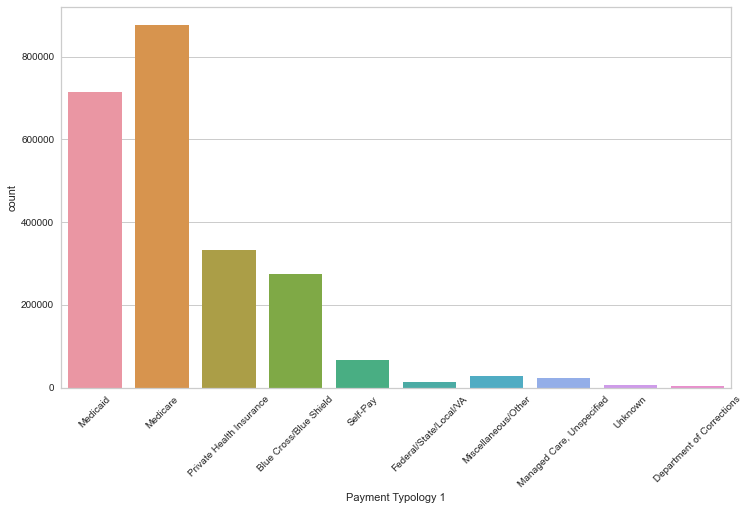

In [110]:
plt.figure(figsize=(12,7))
sns.countplot(x='Payment Typology 1', data = df)
plt.xticks(rotation=45);
df['Payment Typology 1'].value_counts()

The boxplot below shows the correlation between Length of Stay and Payment Typology. **Medicare** is a health insurance system for seniors and people with disabilities. There is some correlation here.

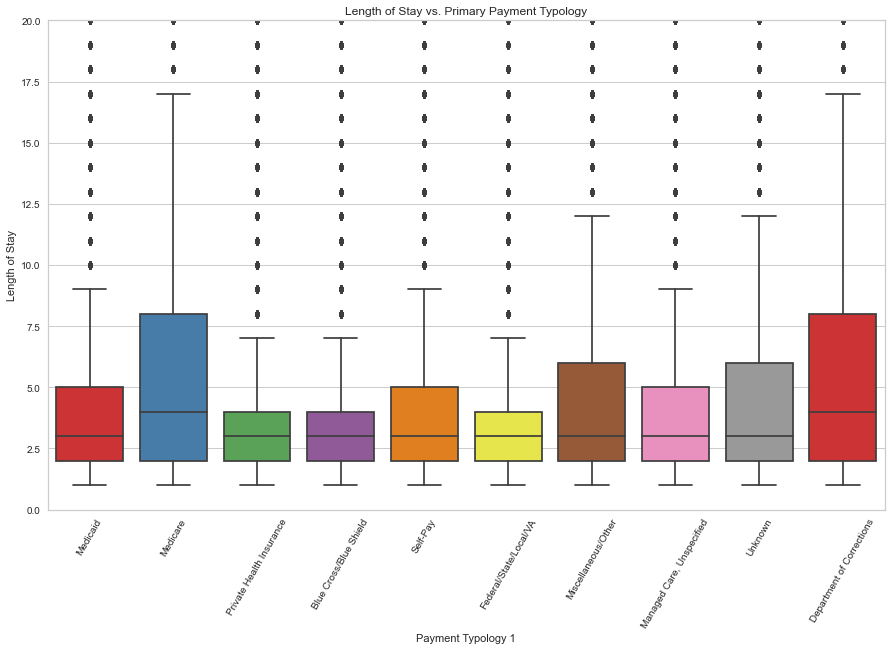

In [111]:
f, ax = plt.subplots(figsize=(15, 9))
sns.boxplot(x="Payment Typology 1", y="Length of Stay", data=df, palette='Set1')
#plt.title('Type of Patient Payments vs. Length of Stay')
ax.set(ylim=(0, 20))
plt.xticks(rotation=60)
plt.title('Length of Stay vs. Primary Payment Typology')
plt.show()

Y    1366490
N     975731
Name: Emergency Department Indicator, dtype: int64

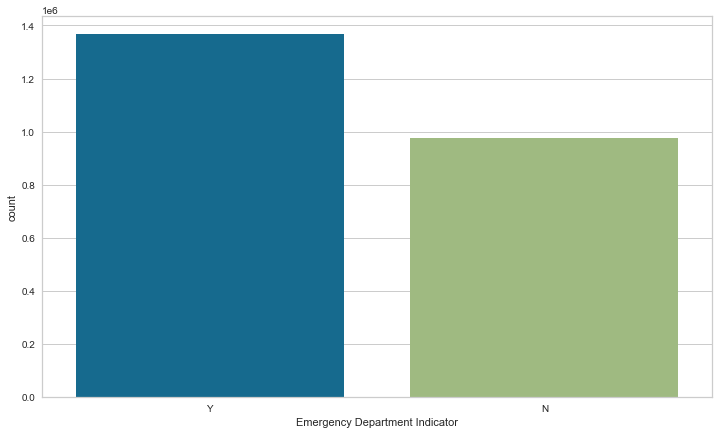

In [112]:
plt.figure(figsize=(12,7))
sns.countplot(x='Emergency Department Indicator', data = df);
df['Emergency Department Indicator'].value_counts()

There are too many parameters to consider here. I will prepare a **WordCloud** to make a detailed analysis for **APR MDC Description**.

Diseases and Disorders of the Circulatory System                                                        289419
Pregnancy, Childbirth and the Puerperium                                                                250907
Newborns and Other Neonates with Conditions Originating in the Perinatal Period                         231451
Diseases and Disorders of the Musculoskeletal System and Conn Tissue                                    204551
Diseases and Disorders of the Digestive System                                                          197548
Diseases and Disorders of the Respiratory System                                                        196391
Diseases and Disorders of the Nervous System                                                            141801
Infectious and Parasitic Diseases, Systemic or Unspecified Sites                                        130892
Mental Diseases and Disorders                                                                           116146
D

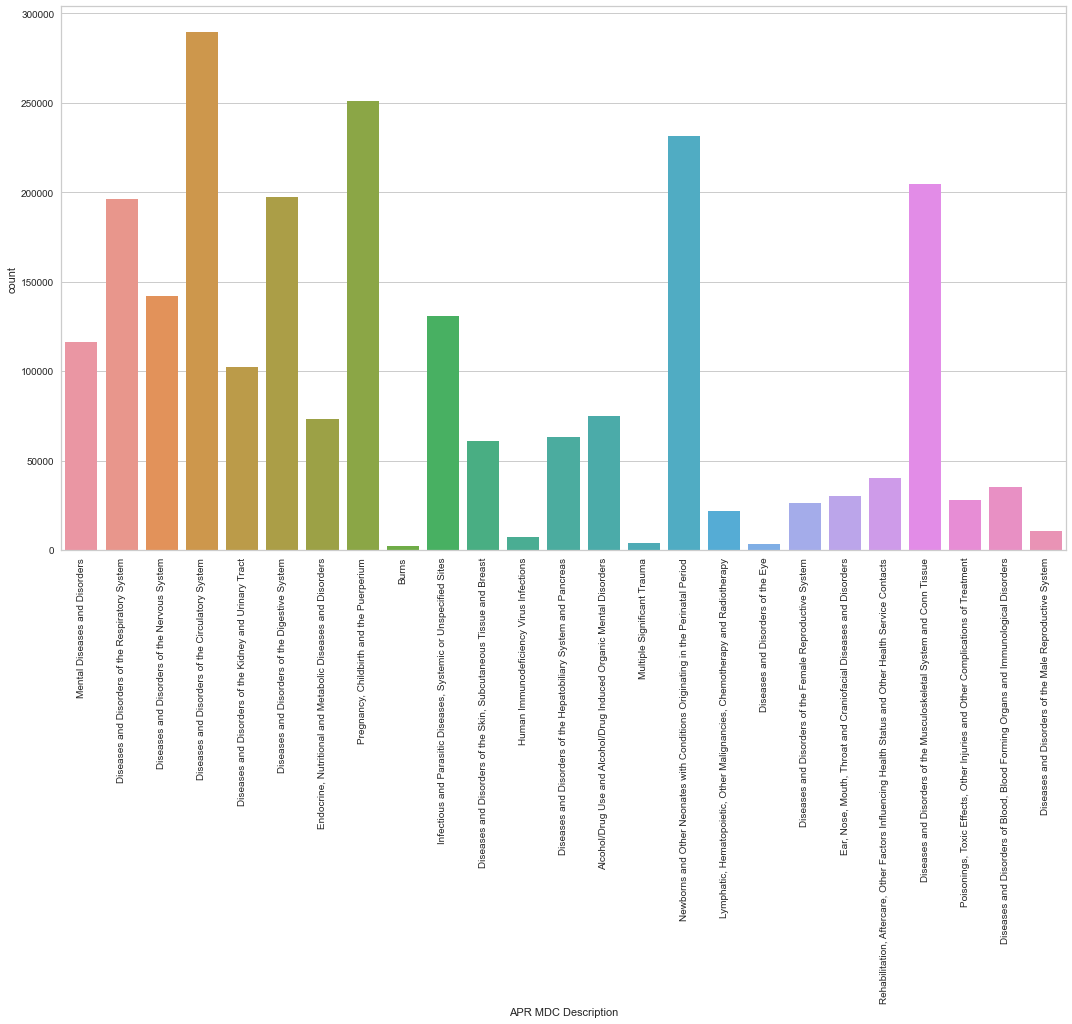

In [113]:
plt.figure(figsize=(18,10))
sns.countplot(x='APR MDC Description', data = df)
plt.xticks(rotation=90);
df['APR MDC Description'].value_counts()

As the below scatterplot shows, there is a correlation between the **Total Costs** and **Length of Stay**.

P.S.: In order to increase the visibility, I used 200,000 of the rows for this graph.

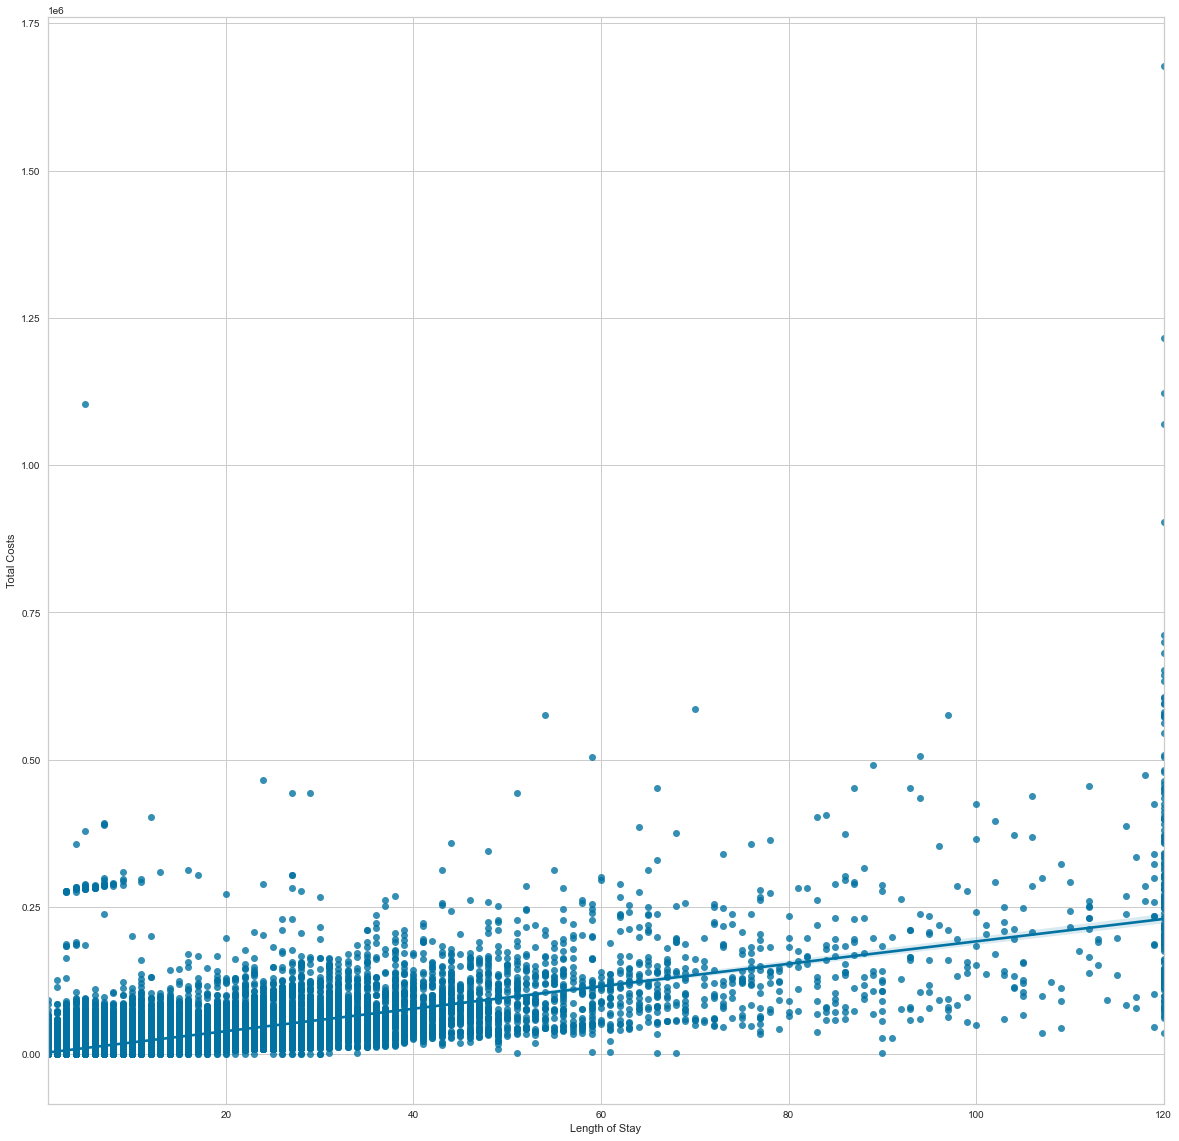

In [114]:
f, ax = plt.subplots(figsize=(20, 20))
sns.regplot(x="Length of Stay", y="Total Costs",
            data=df[0:200000]);

Made a new **dataframe (cost_df)** from the original. Involves only two columns. The target is to specify the most expensive illness types.

In [23]:
cost_df = df[['CCS Diagnosis Description','Total Costs']].groupby('CCS Diagnosis Description', as_index=False).mean()
cost_df = cost_df.sort_values(by='Total Costs', ascending=False, ignore_index=True)
display(cost_df)

CCS Diagnosis Description   Total Costs
0                                            Leukemias  82255.539414
1    Short gestation; low birth weight; and fetal g...  76227.177045
2                                         Tuberculosis  66563.343562
3                                   Spinal cord injury  62398.305067
4                        Respiratory distress syndrome  59006.072000
..                                                 ...           ...
258            OB-related trauma to perineum and vulva   6491.679341
259      Other pregnancy and delivery including normal   6419.875510
260                               Adjustment disorders   6325.364765
261          Hemolytic jaundice and perinatal jaundice   4596.355803
262                     Medical examination/evaluation   4502.010203

[263 rows x 2 columns]

Made a new **dataframe (stay_df)** from the original. Involves only two columns. The target is to specify the illnesses that cause the longest hospital stays.

In [24]:
stay_df = df[['CCS Diagnosis Description','Length of Stay']].groupby('CCS Diagnosis Description', as_index=False).mean()
stay_df = stay_df.sort_values(by='Length of Stay', ascending=False, ignore_index=True)
display(stay_df)

CCS Diagnosis Description  Length of Stay
0    Short gestation; low birth weight; and fetal g...       31.591017
1                        Respiratory distress syndrome       23.727660
2                                         Tuberculosis       21.489237
3                                            Leukemias       19.822296
4          Schizophrenia and other psychotic disorders       17.168233
..                                                 ...             ...
258                      Acute and chronic tonsillitis        1.870309
259                               Spontaneous abortion        1.851351
260                                  Ectopic pregnancy        1.705751
261                  Prolapse of female genital organs        1.683635
262          Hemolytic jaundice and perinatal jaundice        1.604728

[263 rows x 2 columns]

**Top 5 Diagnoses with Longest Average Length of Stay.**

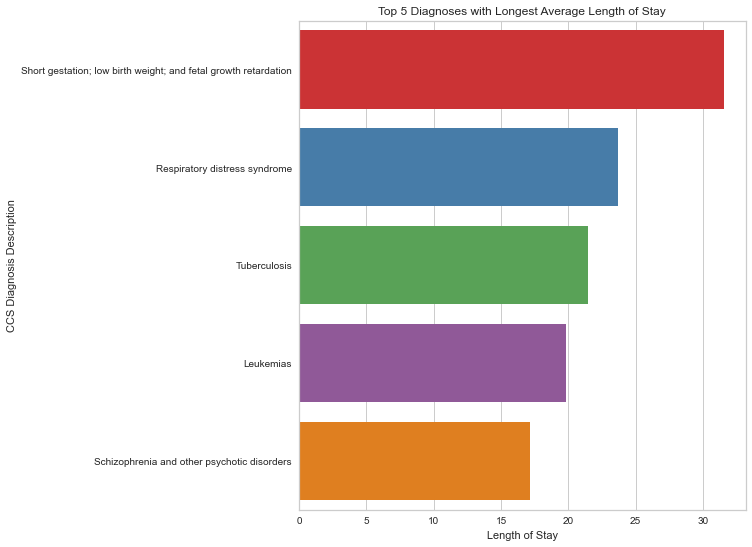

In [25]:
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCS Diagnosis Description", x="Length of Stay", data=stay_df[0:5], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 5 Diagnoses with Longest Average Length of Stay')
plt.show()

**Top 5 Diagnoses with the Highest Total Costs.**

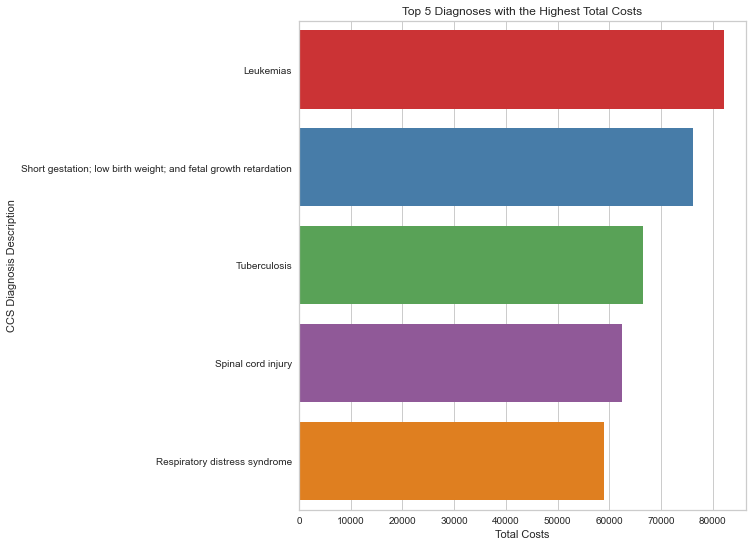

In [26]:
f, ax = plt.subplots(figsize=(8, 9))
sns.barplot(y="CCS Diagnosis Description", x="Total Costs", data=cost_df[0:5], palette='Set1')
#plt.xticks(rotation=45)
plt.title('Top 5 Diagnoses with the Highest Total Costs')
plt.show()

Additionally, **AutoViz** report is generated. Autoviz may be considered as an **automated powerful EDA** in Python.

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (2342221, 33)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  6
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =

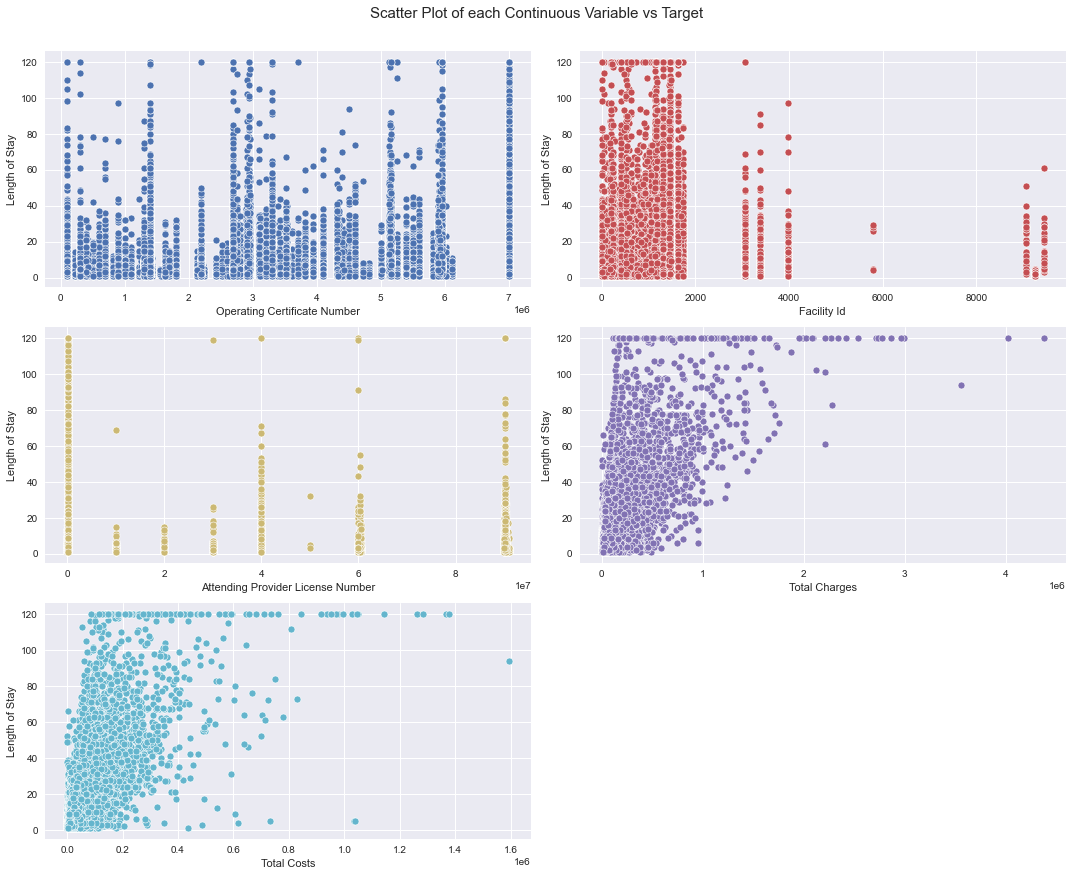

Number of All Scatter Plots = 15


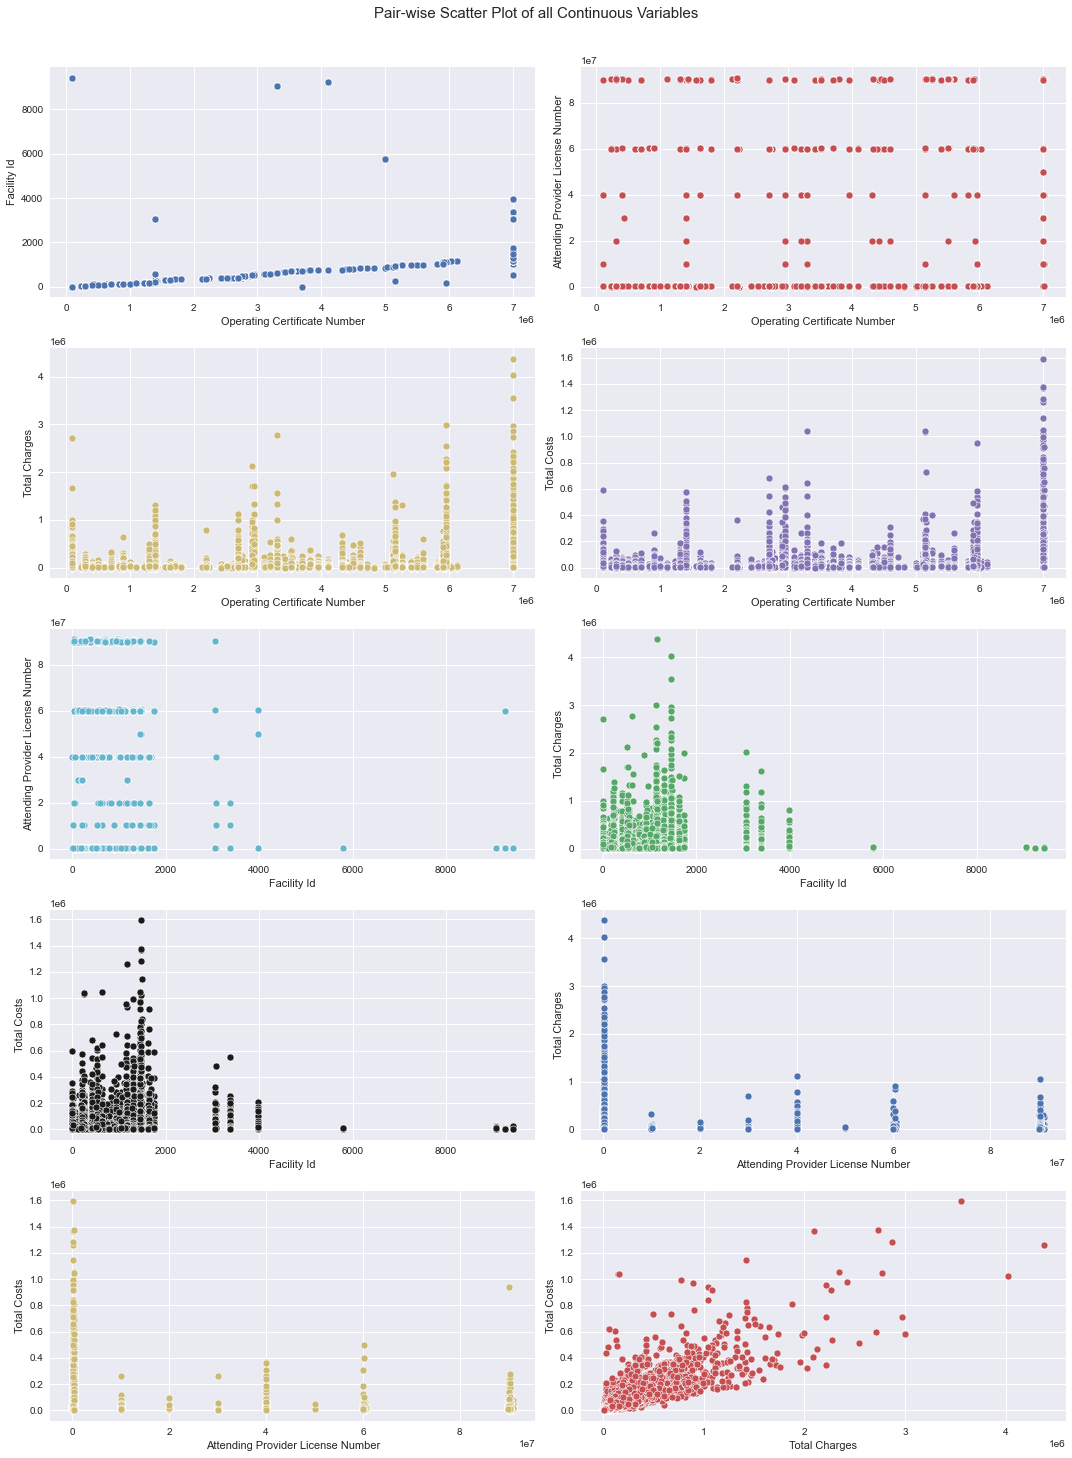

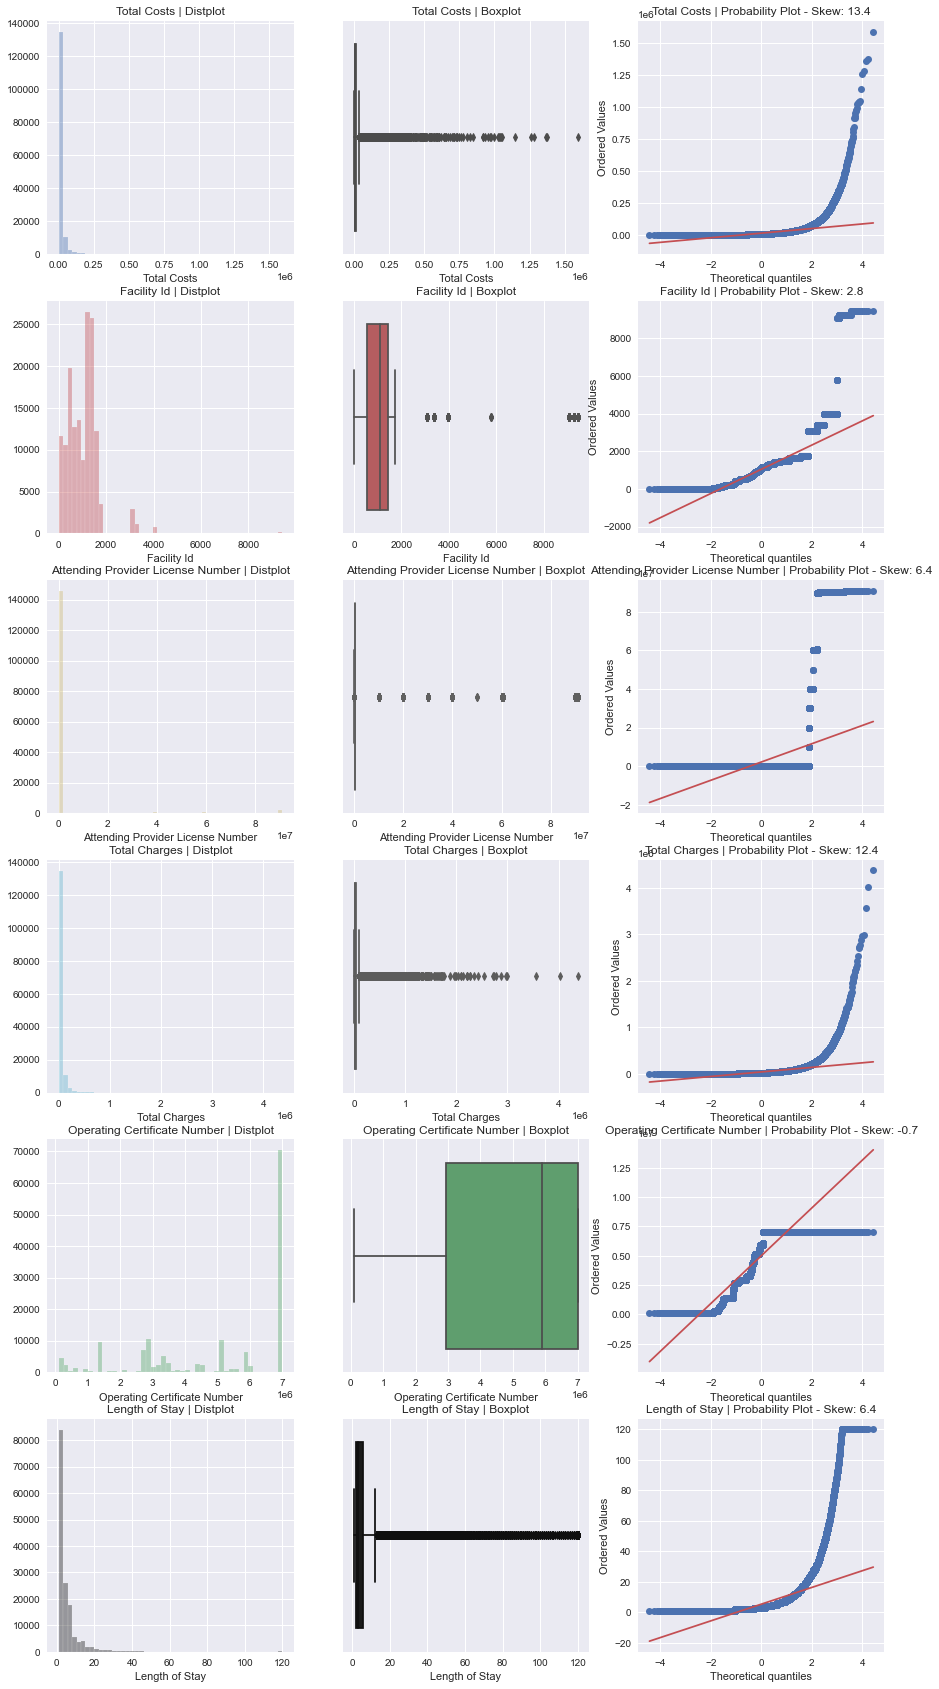

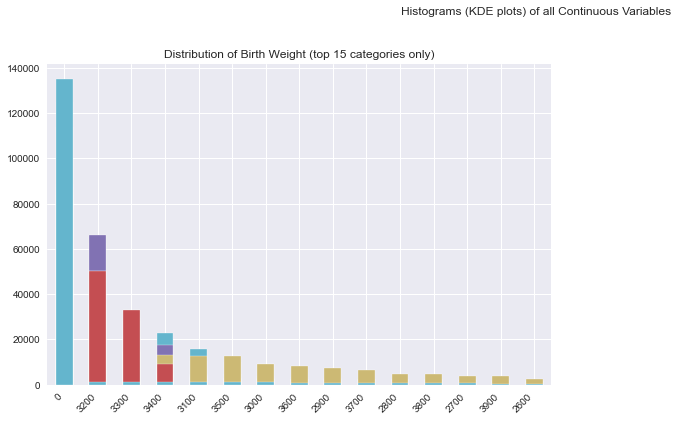

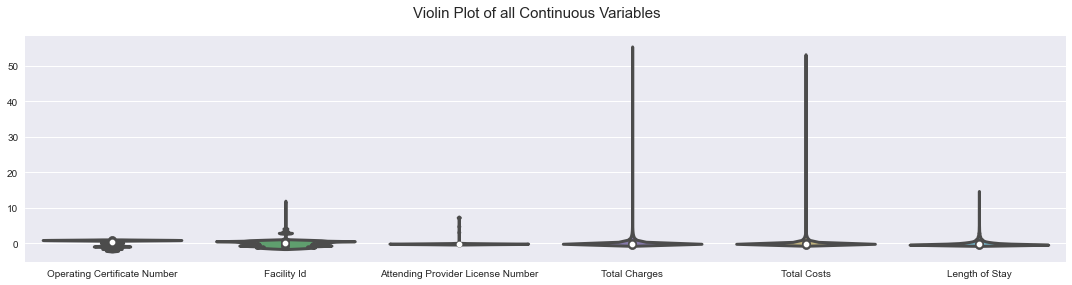

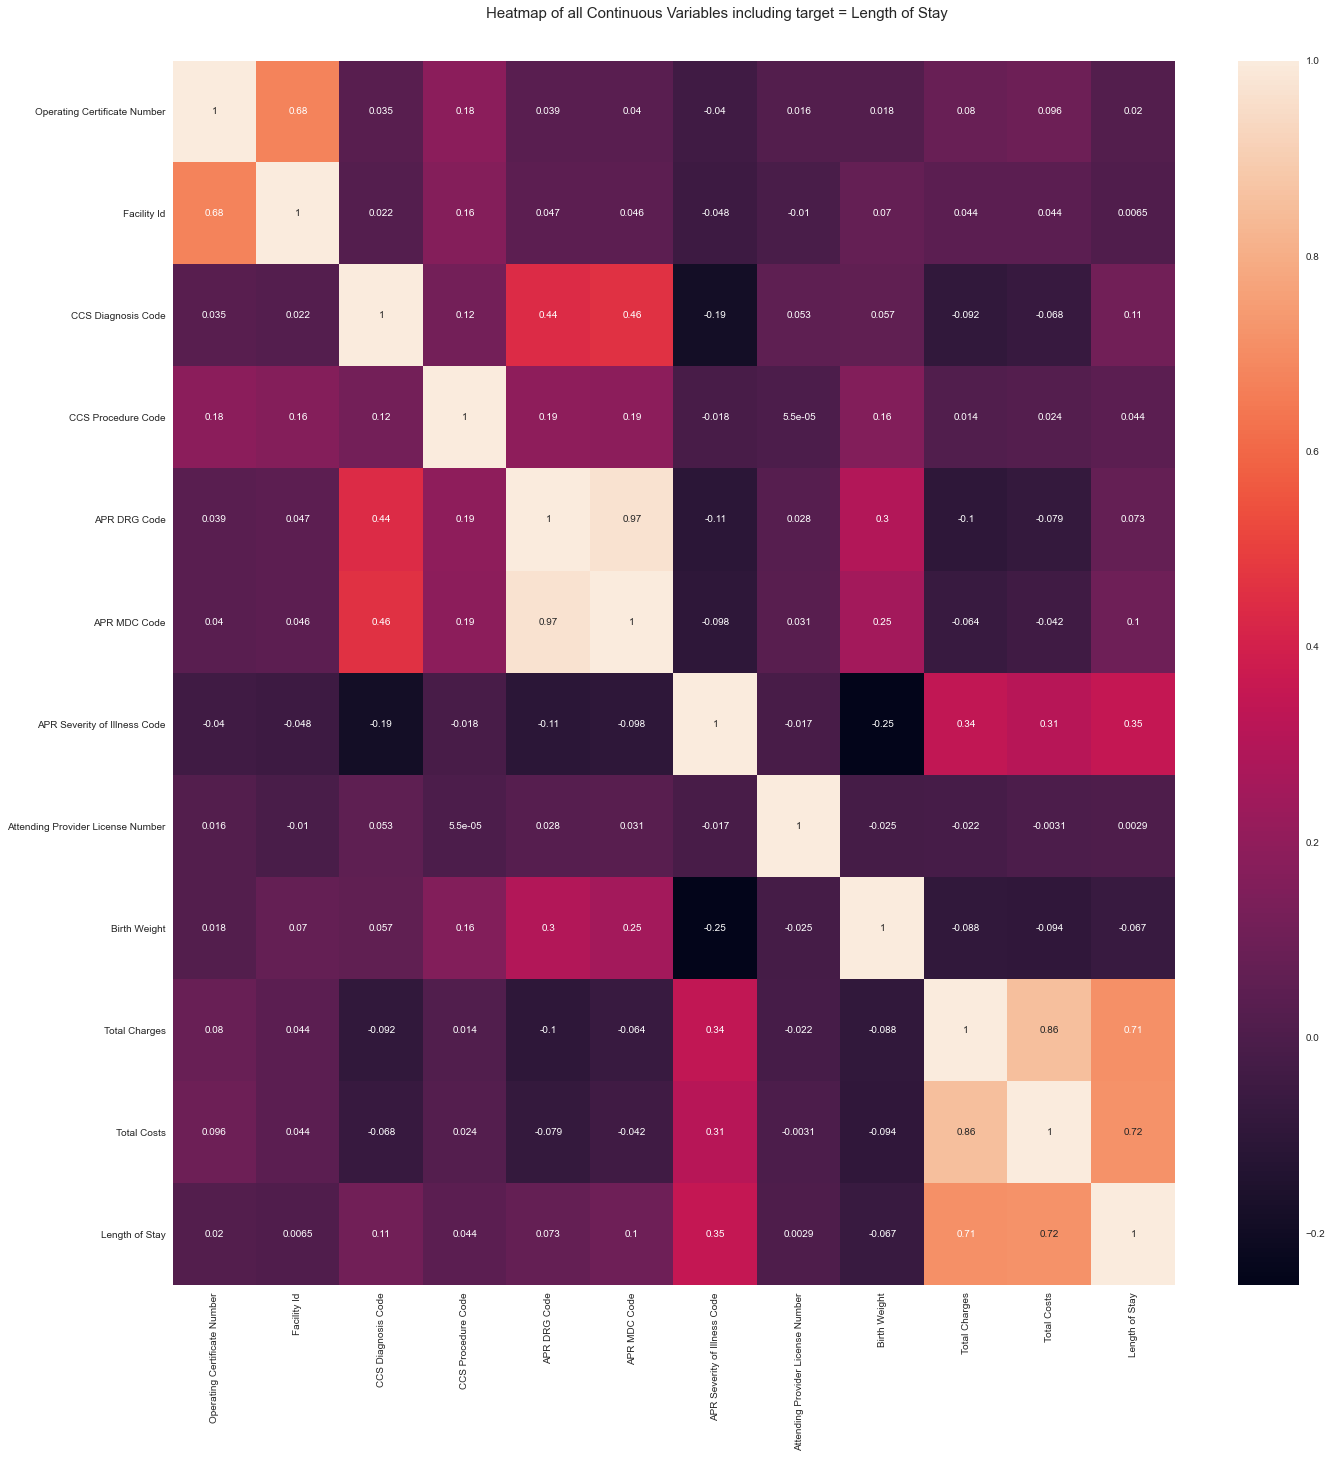

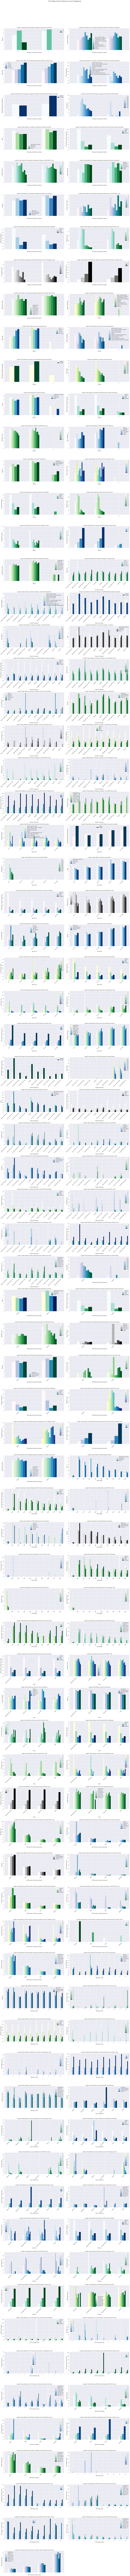

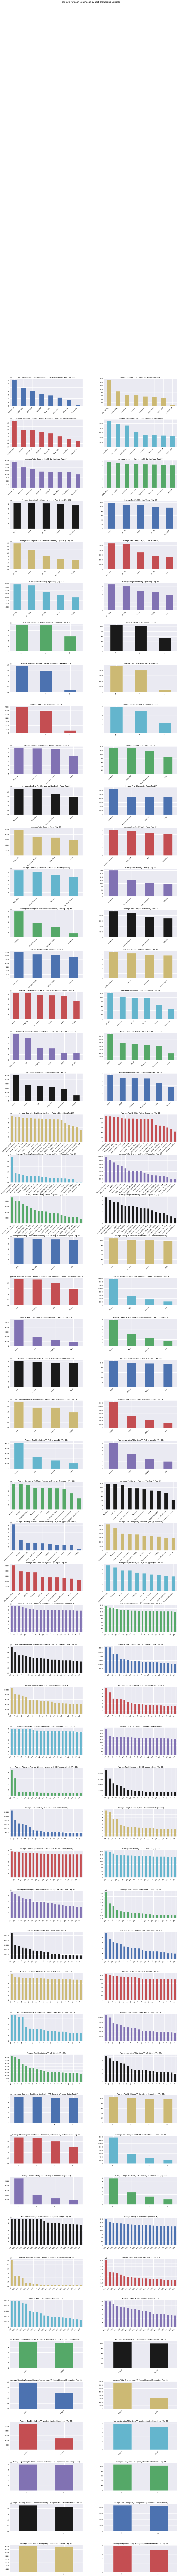

All Plots done
Time to run AutoViz (in seconds) = 128.596

 ###################### VISUALIZATION Completed ########################


In [119]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="Length of Stay",
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

# WordClouds

A tag cloud (**word cloud** or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. 

Tags are usually single words, and the importance of each tag is shown with font size or color. 

This format is useful for quickly perceiving the most prominent terms to determine its relative prominence. 

Bigger term means greater weight.

**CCS Diagnosis Description**

In [120]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.lower())   #removed the .lower intentionaly to keep NNP s
    
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [121]:
df['CCS Diagnosis Description'] = df['CCS Diagnosis Description'].apply(cleaning)

In [122]:
reports =[]

for review in df['CCS Diagnosis Description']:
    reports.append(review) 
reports = ' '.join(reports)
reports[:200]

'mood disorder mood disorder mood disorder asthma epilepsy convulsion nonspecific chest pain essential hypertension influenza epilepsy convulsion pulmonary heart disease nonspecific chest pain urinary '

In [123]:
len(reports)

63572695

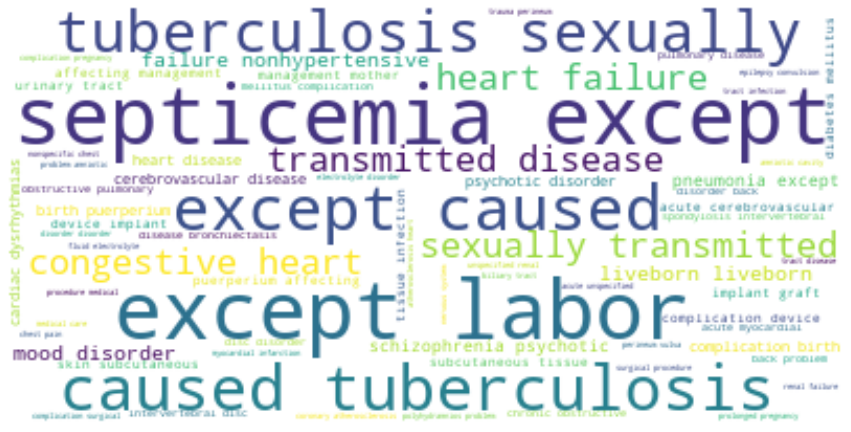

In [124]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

I removed two words - except and caused - in order to get a better wordcloud.

In [125]:
reports = reports.replace('except', '')

In [126]:
reports = reports.replace('caused', '')

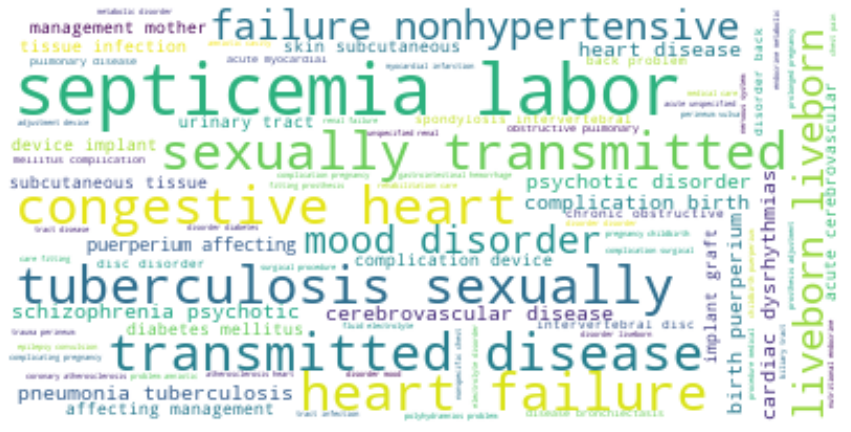

In [127]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**APR MDC Description**

In [128]:
df['APR MDC Description'] = df['APR MDC Description'].apply(cleaning)

In [129]:
reports =[]

for review in df['APR MDC Description']:
    reports.append(review) 
reports = ' '.join(reports)
reports[:200]

'mental disease disorder mental disease disorder mental disease disorder disease disorder respiratory system disease disorder nervous system disease disorder circulatory system disease disorder circula'

In [130]:
len(reports)

98266090

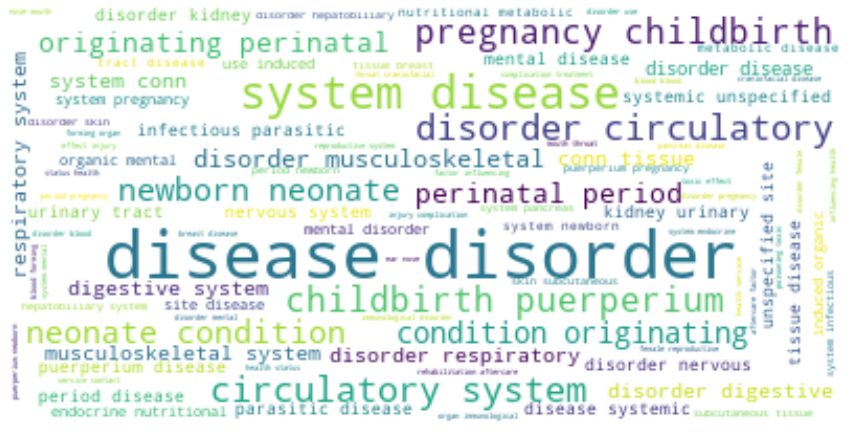

In [131]:
wordcloud = WordCloud(background_color="white", max_words=len(reports))

wordcloud.generate(reports)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Length of Stay Estimation

Before starting the **prediction** process, some columns will be dropped - I do not expect them to have any effect on the precision of the prediction, or the info they are expected to provide are already in other columns. Those columns are:

Zip Code - 3 digits

Facility Name

CCS Diagnosis Description 

CCS Procedure Description 

APR DRG Description 

APR MDC Description 

APR Severity of Illness Description

Discharge Year 

Operating Certificate Number 

Ethnicity 

Hospital County 

Birth Weight 

Attending Provider License Number 

Patient Disposition

In [27]:
df.shape

(2342221, 33)

In [28]:
df1 = df.drop(['APR Severity of Illness Description'], axis=1) 

In [29]:
df1 = df1.drop(['Zip Code - 3 digits'], axis=1) 
df1 = df1.drop(['Facility Name'], axis=1) 
df1 = df1.drop(['CCS Diagnosis Description'], axis=1) 
df1 = df1.drop(['CCS Procedure Description'], axis=1) 
df1 = df1.drop(['APR DRG Description'], axis=1) 
df1 = df1.drop(['APR MDC Description'], axis=1) 
df1 = df1.drop(['Discharge Year'], axis=1) 
df1 = df1.drop(['Operating Certificate Number'], axis=1) 
df1 = df1.drop(['Ethnicity'], axis=1) 
df1 = df1.drop(['Hospital County'], axis=1) 
df1 = df1.drop(['Birth Weight'], axis=1) 
df1 = df1.drop(['Attending Provider License Number'], axis=1) 
df1 = df1.drop(['Patient Disposition'], axis=1) 

In [30]:
df1.shape

(2342221, 19)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342221 entries, 0 to 2346759
Data columns (total 19 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Health Service Area               object 
 1   Facility Id                       float64
 2   Age Group                         object 
 3   Gender                            object 
 4   Race                              object 
 5   Length of Stay                    int32  
 6   Type of Admission                 object 
 7   CCS Diagnosis Code                int64  
 8   CCS Procedure Code                int64  
 9   APR DRG Code                      int64  
 10  APR MDC Code                      int64  
 11  APR Severity of Illness Code      int64  
 12  APR Risk of Mortality             object 
 13  APR Medical Surgical Description  object 
 14  Payment Typology 1                object 
 15  Abortion Edit Indicator           object 
 16  Emergency Department Indicator    ob

In order to **convert categorical variables** into dummy/indicator variables, I applied Pandas get_dummies**** function and prepared a new dataframe (df2).

In [32]:
df2 = pd.get_dummies(df1)

In [33]:
df2.shape

(2342221, 54)

The new DataFrame has 54 columns. **Correlation** values of all the columns with the target column **Length of Stay** can be seen below.

<AxesSubplot:>

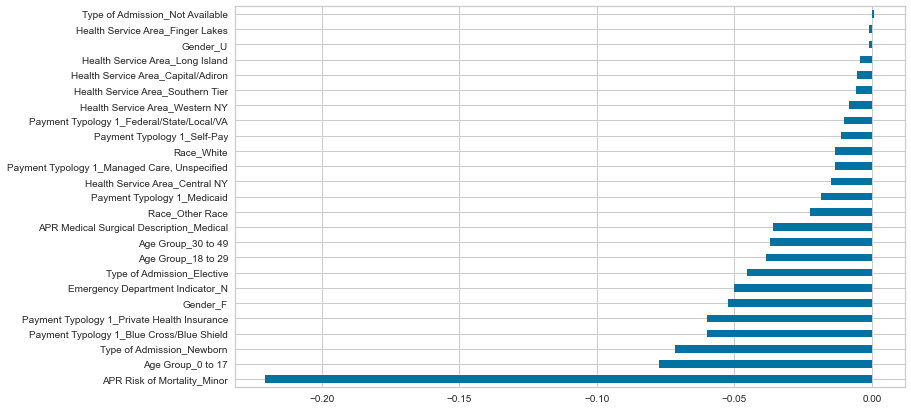

In [34]:
plt.figure(figsize=(12,7))
df2.corr()['Length of Stay'].sort_values().head(25).plot.barh()

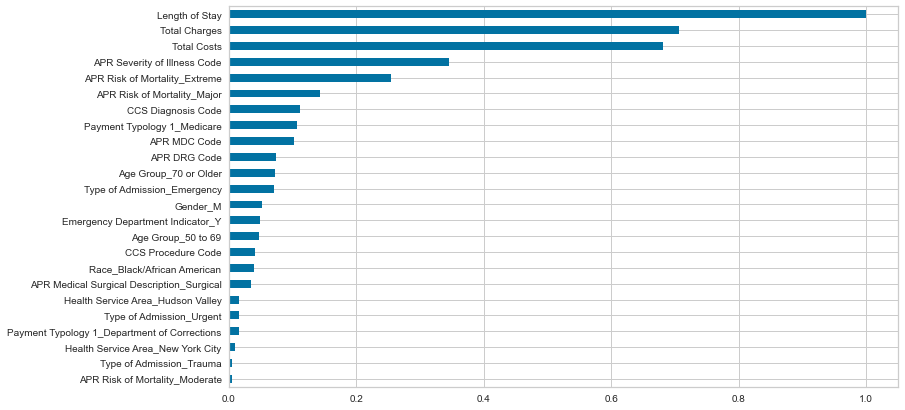

In [35]:
plt.figure(figsize=(12,7))
df2.corr()['Length of Stay'].sort_values().tail(25)[:-1].plot.barh();

Another DataFrame (df3), only  50,000 rows. **Cross Validation** and GridSearchCV took 8 hours, so I prepared a short subset.

In [29]:
#df3 = df2.iloc[0:50000,]

In [48]:
df3 = df2.sample(n = 50000) 

In [49]:
df3.shape

(50000, 54)

**Train-Test-Split**

I already proved in a scatter plot (and shown above) that length of stay is highly correlated to cost and charges, so I dropped those columns.

In [50]:
X = df2.drop(['Length of Stay','Total Charges'], axis=1)
y = df2[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
X_train.shape

(1639554, 52)

In [52]:
y_train.shape

(1639554, 1)

**Linear Regression**

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [55]:
lm = LinearRegression()

In [56]:
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = lm.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
eval_metrics(y_test, y_pred)

r2_score: 0.5419935170224421 
 mae: 2.5250100703441154 
 mse: 29.46446799785715 
 rmse: 5.428118274121995


The results show that, the relationship is far away from being linear. I will apply various algorithms to improve the results.

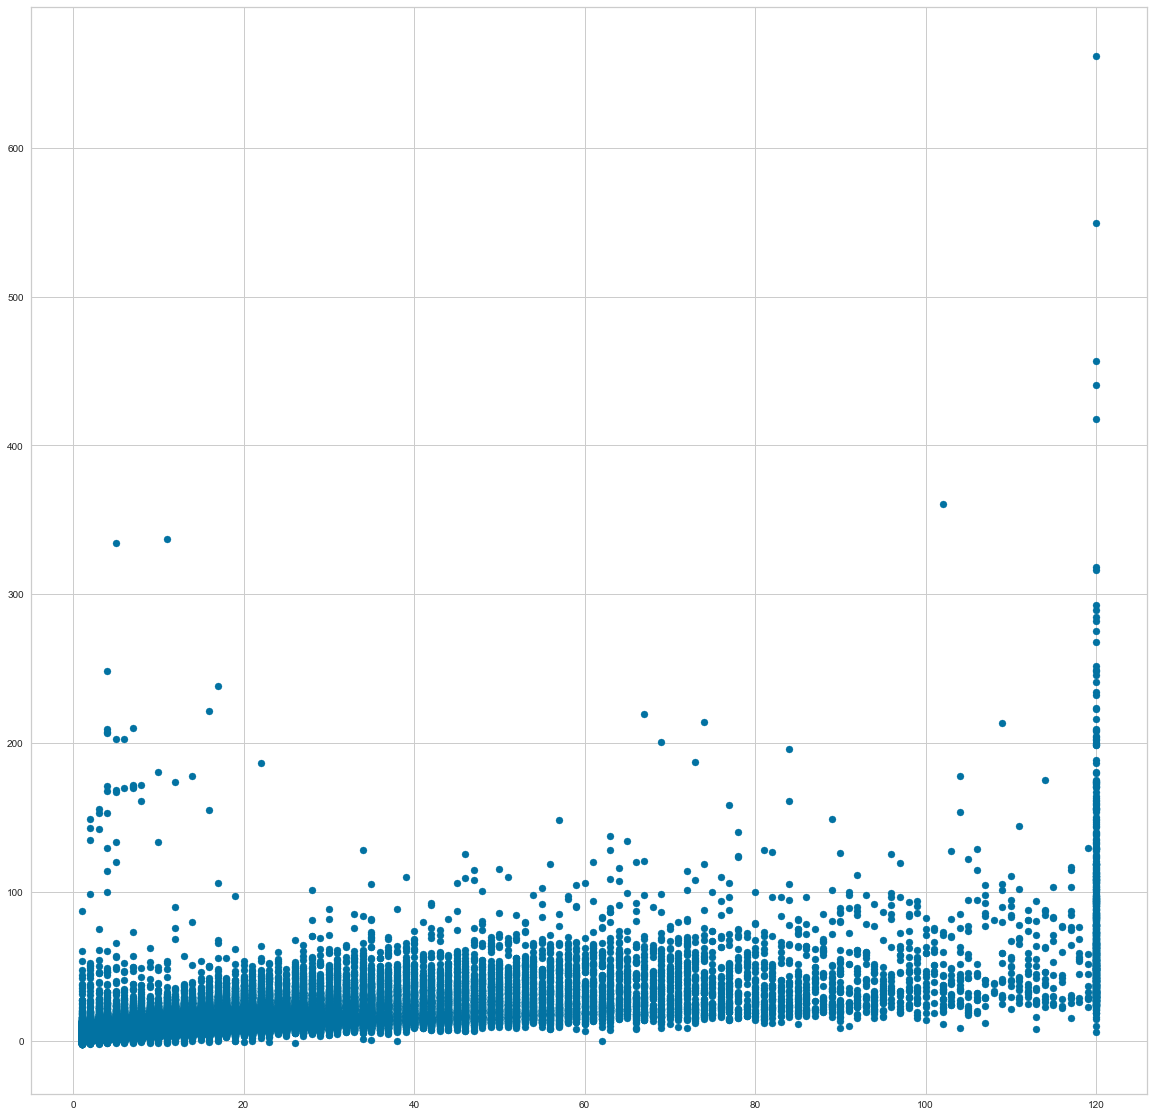

In [59]:
plt.figure(figsize=(20,20))
plt.scatter(y_test, y_pred); 

**Random Forest Regressor**

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf_reg = RandomForestRegressor()

In [62]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_pred = rf_reg.predict(X_test)

In [64]:
eval_metrics(y_test, y_pred)

r2_score: 0.8907089895626706 
 mae: 1.0725746733147543 
 mse: 7.030908074814197 
 rmse: 2.6515859546343576


There is a huge improvement in the metrics, which show that Random Forest made e better learning.

I will apply some tuning on some parameters.

**Random Forest Tuning**

In [65]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [66]:
rf_cv_model = GridSearchCV(rf_reg, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 48.4min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 169.3min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 349.7min finished


In [67]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 300}

In [68]:
rf_tuned = RandomForestRegressor(max_depth = 7,
                                max_features = 8,
                                min_samples_split = 2,
                                 n_estimators = 300)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features=8, n_estimators=300)

In [69]:
y_pred = rf_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.6279045140780402 
 mae: 2.4223671912925635 
 mse: 23.937642685358895 
 rmse: 4.892611029436011


In [71]:
#accuraries = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=10)
#accuraries.mean()

RF Tuning did **not improve** the results.

**Without changing the max depth**

In [72]:
rf_tuned_2 = RandomForestRegressor(max_features = 8,
                                min_samples_split = 2,
                                 n_estimators = 300)
rf_tuned_2.fit(X_train, y_train)

RandomForestRegressor(max_features=8, n_estimators=300)

In [73]:
y_pred = rf_tuned_2.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.855839602507624 
 mae: 1.3431292989496135 
 mse: 9.274125097221841 
 rmse: 3.045344824025982


In [74]:
#accuraries = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=10)
#accuraries.mean()

The best results are provided by standart RF.

**RF Feature Importance**

In [102]:
rf_reg.feature_importances_

array([9.41436310e-02, 1.12699465e-01, 2.09139364e-02, 3.06494821e-02,
       9.23315947e-03, 3.14917872e-02, 6.09481402e-01, 1.31279960e-03,
       1.45408686e-03, 2.30235525e-03, 1.75698490e-03, 5.32958071e-03,
       1.70948121e-03, 6.77639381e-04, 1.74423785e-03, 2.37335081e-03,
       1.05804729e-03, 1.45304641e-03, 1.81073664e-03, 1.92760503e-03,
       1.46536020e-03, 1.51172950e-03, 5.79407197e-08, 1.89282515e-03,
       2.77693607e-04, 1.58403771e-03, 1.84014199e-03, 5.18105962e-03,
       6.26641934e-03, 2.50249203e-03, 4.27878093e-05, 3.51861887e-04,
       1.33532790e-03, 1.91469835e-03, 1.89174282e-03, 5.97745676e-03,
       1.44829346e-03, 8.51264803e-03, 7.80867946e-03, 1.21655020e-03,
       1.42507695e-04, 1.43085143e-04, 2.10954089e-04, 1.78252216e-03,
       2.06670547e-03, 5.74583968e-04, 1.41183584e-03, 1.31220950e-03,
       3.48860092e-04, 0.00000000e+00, 2.81262378e-03, 2.64943359e-03])

In [103]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_},
                          index = X_train.columns)

In [104]:
importance.sort_values(by="importance", ascending = False).head(10)

importance
Total Costs                                  0.609481
CCS Diagnosis Code                           0.112699
Facility Id                                  0.094144
APR Severity of Illness Code                 0.031492
APR DRG Code                                 0.030649
CCS Procedure Code                           0.020914
APR MDC Code                                 0.009233
APR Medical Surgical Description_Medical     0.008513
APR Medical Surgical Description_Surgical    0.007809
Type of Admission_Emergency                  0.006266

**Feature Selection with RF**

Considering the importance values, I selected the first 5 columns/parameters.

In [105]:
new_list = ['Total Costs', 'CCS Diagnosis Code', 'Facility Id', 'APR Severity of Illness Code', 'APR DRG Code']  

In [109]:
X = df2[new_list]
y = df2['Length of Stay']

In [111]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2342221 entries, 0 to 2346759
Data columns (total 5 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Total Costs                   float64
 1   CCS Diagnosis Code            int64  
 2   Facility Id                   float64
 3   APR Severity of Illness Code  int64  
 4   APR DRG Code                  int64  
dtypes: float64(2), int64(3)
memory usage: 107.2 MB


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [113]:
rf_reg = RandomForestRegressor()

In [114]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
y_pred = rf_reg.predict(X_test)

In [116]:
eval_metrics(y_test, y_pred)

r2_score: 0.8733404533115758 
 mae: 1.1771938560156106 
 mse: 8.375834452994258 
 rmse: 2.894103393625435


By using the **feature importance** approach, I reduced the number of parameters from 54 to 5, and the decrease in the r2_score was only 2%.

Considering the huge number of data in the dataset, time to get the results of analysis decreased from hours to a couple of minutes - with only a smal  decrease in metrics.  

**XGBoost Regressor**

In [119]:
import xgboost

In [76]:
model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
y_pred = model_xg.predict(X_test)

In [78]:
eval_metrics(y_test, y_pred)

r2_score: 0.8842159761959175 
 mae: 1.31931314634841 
 mse: 7.448616538918471 
 rmse: 2.7292153705632085


XGBoost is an algorithm that has recently been dominating applied machine learning. I got the best results from **XGBoost**.

**GridSearch with XGBoost**

In [79]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [80]:
from sklearn.model_selection import GridSearchCV
xgb_cv_model  = GridSearchCV(model_xg,xgb_params, cv = 3, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 260.7min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed: 365.9min finished


In [81]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1}

In [82]:
xgb_tuned = xgboost.XGBRegressor(subsample = 1, 
                         learning_rate = 0.1, 
                         max_depth = 7, 
                         n_estimators = 300).fit(X_train, y_train)

In [83]:
y_pred = xgb_tuned.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.898511964584348 
 mae: 1.2124417395603626 
 mse: 6.528927172012094 
 rmse: 2.5551765441965246


GridSearchCV did not proved an improvement in the results.

# **Deep Learning**

Considering the ample amount of data, I tried Deep learning. I changed the number and values of nodes many times, but did not get very satisfactory results. 

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [85]:
model = Sequential()

#model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(2))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [86]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 64, epochs = 100)

Epoch 1/100
25619/25619 [==============================] - 37s 1ms/step - loss: 401.9217 - val_loss: 36.1546
Epoch 2/100
25619/25619 [==============================] - 31s 1ms/step - loss: 41.6297 - val_loss: 34.5907
Epoch 3/100
25619/25619 [==============================] - 41s 2ms/step - loss: 39.3478 - val_loss: 33.1216
Epoch 4/100
25619/25619 [==============================] - 42s 2ms/step - loss: 38.1327 - val_loss: 34.5122
Epoch 5/100
25619/25619 [==============================] - 43s 2ms/step - loss: 35.3698 - val_loss: 34.9486
Epoch 6/100
25619/25619 [==============================] - 41s 2ms/step - loss: 37.7183 - val_loss: 32.9535
Epoch 7/100
25619/25619 [==============================] - 36s 1ms/step - loss: 37.0295 - val_loss: 32.4519
Epoch 8/100
25619/25619 [==============================] - 42s 2ms/step - loss: 35.9398 - val_loss: 34.2163
Epoch 9/100
25619/25619 [==============================] - 35s 1ms/step - loss: 41.4593 - val_loss: 34.7094
Epoch 10/100
25619/25619 [=

25619/25619 [==============================] - 44s 2ms/step - loss: 36.1728 - val_loss: 42.2323
Epoch 77/100
25619/25619 [==============================] - 38s 1ms/step - loss: 37.8242 - val_loss: 31.1132
Epoch 78/100
25619/25619 [==============================] - 35s 1ms/step - loss: 33.4873 - val_loss: 38.7812
Epoch 79/100
25619/25619 [==============================] - 34s 1ms/step - loss: 40.8020 - val_loss: 30.3668
Epoch 80/100
25619/25619 [==============================] - 33s 1ms/step - loss: 36.4150 - val_loss: 29.9816
Epoch 81/100
25619/25619 [==============================] - 38s 1ms/step - loss: 36.5807 - val_loss: 31.3169
Epoch 82/100
25619/25619 [==============================] - 38s 1ms/step - loss: 34.9792 - val_loss: 36.6182
Epoch 83/100
25619/25619 [==============================] - 37s 1ms/step - loss: 40.0004 - val_loss: 33.9992
Epoch 84/100
25619/25619 [==============================] - 36s 1ms/step - loss: 39.0327 - val_loss: 66.7434
Epoch 85/100
25619/25619 [======

In [87]:
losses = pd.DataFrame(model.history.history)

In [88]:
losses

loss   val_loss
0   130.998016  36.154606
1    40.903538  34.590694
2    38.694092  33.121567
3    37.586323  34.512184
4    38.557487  34.948589
..         ...        ...
95   33.846432  31.853651
96   35.352631  29.722342
97   36.231186  57.511082
98   38.737156  33.350941
99   37.351837  30.016193

[100 rows x 2 columns]

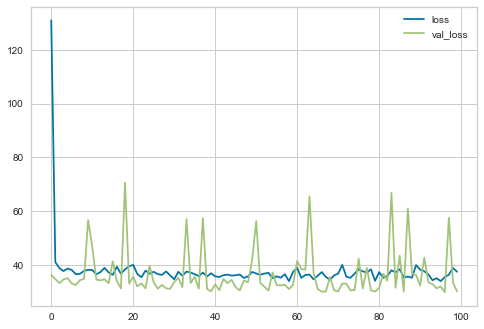

In [89]:
losses.plot();

(0.0, 400.0)

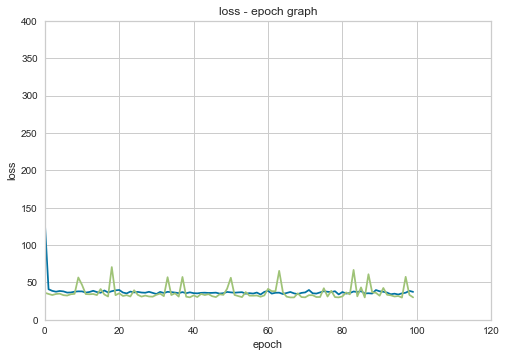

In [90]:
fig, ax= plt.subplots()
ax.plot(losses)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0,120]) # focusing on the given x values
ax.set_ylim([0,400]) # focusing on the given y values

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
import numpy as np

In [92]:
y_pred = model.predict(X_test)

In [178]:
eval_metrics(y_test, y_pred)

r2_score: 0.5735372480226155 
 mae: 2.8130892997662227 
 mse: 26.775411644056057 
 rmse: 5.174496269595337


In [93]:
explained_variance_score(y_test, y_pred)

0.5341954659968795

Using all the data

In [94]:
X = df2.drop(['Length of Stay','Total Charges'], axis=1)
y = df2[['Length of Stay']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [95]:
X_train.shape

(1639554, 52)

In [96]:
model = Sequential()

#model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(4))
model.add(Dense(2))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [97]:
model.fit(x = X_train, y = y_train,validation_data = (X_test, y_test), batch_size = 128, epochs = 100)

Epoch 1/100
12810/12810 [==============================] - 16s 1ms/step - loss: 48142.9669 - val_loss: 633.1969
Epoch 2/100
12810/12810 [==============================] - 16s 1ms/step - loss: 783.8051 - val_loss: 44.3243
Epoch 3/100
12810/12810 [==============================] - 16s 1ms/step - loss: 39.7976 - val_loss: 44.4767
Epoch 4/100
12810/12810 [==============================] - 15s 1ms/step - loss: 38.1024 - val_loss: 33.3343
Epoch 5/100
12810/12810 [==============================] - 16s 1ms/step - loss: 38.3385 - val_loss: 33.5828
Epoch 6/100
12810/12810 [==============================] - 16s 1ms/step - loss: 37.1229 - val_loss: 33.8050
Epoch 7/100
12810/12810 [==============================] - 17s 1ms/step - loss: 37.0238 - val_loss: 33.1092
Epoch 8/100
12810/12810 [==============================] - 16s 1ms/step - loss: 38.7580 - val_loss: 31.7143
Epoch 9/100
12810/12810 [==============================] - 15s 1ms/step - loss: 37.3291 - val_loss: 32.2572
Epoch 10/100
12810/1281

12810/12810 [==============================] - 16s 1ms/step - loss: 34.1137 - val_loss: 32.9044
Epoch 77/100
12810/12810 [==============================] - 21s 2ms/step - loss: 34.1783 - val_loss: 35.1259
Epoch 78/100
12810/12810 [==============================] - 16s 1ms/step - loss: 36.8105 - val_loss: 40.4909
Epoch 79/100
12810/12810 [==============================] - 15s 1ms/step - loss: 40.0773 - val_loss: 29.8048
Epoch 80/100
12810/12810 [==============================] - 17s 1ms/step - loss: 34.9624 - val_loss: 31.8136
Epoch 81/100
12810/12810 [==============================] - 18s 1ms/step - loss: 32.8913 - val_loss: 32.8509
Epoch 82/100
12810/12810 [==============================] - 21s 2ms/step - loss: 33.8161 - val_loss: 37.2070
Epoch 83/100
12810/12810 [==============================] - 16s 1ms/step - loss: 34.4118 - val_loss: 31.7387
Epoch 84/100
12810/12810 [==============================] - 15s 1ms/step - loss: 33.7266 - val_loss: 31.2415
Epoch 85/100
12810/12810 [======

In [98]:
y_pred = model.predict(X_test)

In [100]:
eval_metrics(y_test, y_pred)

r2_score: 0.5415398665605557 
 mae: 2.4950146586746302 
 mse: 29.201708456432517 
 rmse: 5.40386051415398


In [101]:
explained_variance_score(y_test, y_pred)

0.5415428918756726

# Result

**Random Forest Regressor** provided the best results as shown below:


r2_score: 0.8907089895626706 

 mae: 1.0725746733147543 
 
 mse: 7.030908074814197 
 
 rmse: 2.6515859546343576
 


**XGBoost Regressor** provided quite close results as shown below:

r2_score: 0.8821108497127713

mae: 1.311192620413811 

mse: 7.553599742604198 

rmse: 2.748381294981502



I applied **Feature Selection** on **Random Forest Regressor** and the results were still satisfactory:


r2_score: 0.8733404533115758 

 mae: 1.1771938560156106 
 
 mse: 8.375834452994258 
 
 rmse: 2.894103393625435

**Feature Selection** was also pretty valuable in this dataset.

I was able to decrease the number of columns/parameters from 54 to 5 and still got quite similar results.

According to the Feature Selection, the most important columns in predicting the **Length of Stay** in a hospital are:

**1. Total Costs**

**2. CCS Diagnosis Code**

**3. Facility Id**

**4. APR Severity of Illness Code**

**5. APR DRG Code**